In [2]:
import pandas as pd
import numpy as np

data = '../data/sample_submission_V2.csv'
pubgDF = pd.read_csv(data)
pubgDF

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [4]:
trainDF = pd.read_csv('../data/train_V2.csv')
trainDF

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [5]:
trainDF.shape, trainDF.Id.value_counts(), trainDF.groupId.value_counts()

((4446966, 29),
 Id
 7f96b2f878858a    1
 d19659ceb5b553    1
 b587ef96cf8d87    1
 66715fcb3b871d    1
 59e0d2fdd292a8    1
                  ..
 0f3c9b54ce4173    1
 9a91d96d201b22    1
 a92d0949e8830e    1
 f1d8ef55f70584    1
 0d8e7ed728b6fd    1
 Name: count, Length: 4446966, dtype: int64,
 groupId
 14d6b54cdec6bc    74
 b8275198faa03b    72
 128b07271aa012    64
 7385e5fe214021    49
 e52a2e6ca30474    36
                   ..
 5941df37c809be     1
 ab58ce5a22ed97     1
 7b5f1742ce18a5     1
 ed3a2c5863cee3     1
 8c74f72fedf5ff     1
 Name: count, Length: 2026745, dtype: int64)

In [6]:
testDF = pd.read_csv('../data/test_V2.csv')
testDF

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,...,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,...,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,...,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,...,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [79]:
trainDF.shape, testDF.shape, pubgDF.shape
# trainDF.columns, testDF.columns

((4446966, 29), (1934174, 28), (1934174, 2))

In [80]:
trainDF.duplicated().sum()

0

In [81]:
trainDF['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [82]:
list(trainDF['matchType'].unique())


['squad-fpp',
 'duo',
 'solo-fpp',
 'squad',
 'duo-fpp',
 'solo',
 'normal-squad-fpp',
 'crashfpp',
 'flaretpp',
 'normal-solo-fpp',
 'flarefpp',
 'normal-duo-fpp',
 'normal-duo',
 'normal-squad',
 'crashtpp',
 'normal-solo']

In [83]:
for i in list(trainDF['matchType'].unique()):
    print(trainDF[trainDF['matchType']==i].shape)

(1756186, 29)
(313591, 29)
(536762, 29)
(626526, 29)
(996691, 29)
(181943, 29)
(17174, 29)
(6287, 29)
(2505, 29)
(1682, 29)
(718, 29)
(5489, 29)
(199, 29)
(516, 29)
(371, 29)
(326, 29)


In [84]:
# 그냥 3인칭, fpp-1인칭

soloDF = trainDF[trainDF['matchType']== 'solo']
solofppDF = trainDF[trainDF['matchType']== 'solo-fpp']
duoDF = trainDF[trainDF['matchType']== 'duo']
duofppDF = trainDF[trainDF['matchType']== 'duo-fpp']
squadDF = trainDF[trainDF['matchType']== 'squad']
squadfppDF = trainDF[trainDF['matchType']== 'squad-fpp']


In [85]:
soloDF

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
36,269c3fc4a26935,3c07be51998e6f,ce9bc89b3ca08c,0,1,100.00,0,0,0,24,...,0,0.0,0,61.00,0,0,1528.0,3,0,0.8462
63,73348483a5974b,1c8e486a643207,85601fe44d519b,0,0,17.81,0,0,0,79,...,0,129.3,0,0.00,0,0,471.9,3,1536,0.2245
69,caa1a36afeb7b2,c653cfca3b8b06,e5e181d2da0334,0,1,100.00,0,0,0,38,...,0,0.0,0,0.00,0,0,231.7,4,1500,0.1573
91,5fd62798396ca8,bb19a05801d30d,9e3c46f8acde82,0,0,36.00,0,0,0,84,...,0,0.0,0,0.00,0,0,292.6,1,0,0.1075
100,18d002b46b1abc,00a3f236559532,eccc44618c0442,0,1,236.00,0,0,7,7,...,0,0.0,0,0.00,0,0,1913.0,8,1557,0.9355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446889,5c202630dc0dc2,4e82827eebfd8a,f7cee5477fe420,1,2,200.90,0,0,1,25,...,0,1748.0,0,27.51,0,0,2184.0,9,1498,0.7419
4446925,3e0416c632ea6a,23e966c3ed5693,16508ccea9813c,0,0,0.00,0,0,0,87,...,0,0.0,0,0.00,0,0,175.6,1,0,0.1122
4446929,a9f6a611553020,c1717785e5a1ba,37bb6013192a8e,0,7,294.10,0,0,6,6,...,0,0.0,0,133.70,0,0,3148.0,3,1469,0.9694
4446934,5753446d38b5c3,84768a497e690e,836a793f238ea6,0,0,101.00,0,0,1,31,...,0,0.0,0,0.00,0,0,386.2,3,0,0.4301


In [86]:
soloDF.DBNOs

36         0
63         0
69         0
91         0
100        0
          ..
4446889    0
4446925    0
4446929    0
4446934    0
4446962    0
Name: DBNOs, Length: 181943, dtype: int64

In [87]:
soloDF.DBNOs.unique()

array([0])

In [88]:
squadDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626526 entries, 8 to 4446952
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               626526 non-null  object 
 1   groupId          626526 non-null  object 
 2   matchId          626526 non-null  object 
 3   assists          626526 non-null  int64  
 4   boosts           626526 non-null  int64  
 5   damageDealt      626526 non-null  float64
 6   DBNOs            626526 non-null  int64  
 7   headshotKills    626526 non-null  int64  
 8   heals            626526 non-null  int64  
 9   killPlace        626526 non-null  int64  
 10  killPoints       626526 non-null  int64  
 11  kills            626526 non-null  int64  
 12  killStreaks      626526 non-null  int64  
 13  longestKill      626526 non-null  float64
 14  matchDuration    626526 non-null  int64  
 15  matchType        626526 non-null  object 
 16  maxPlace         626526 non-null  int64  


In [89]:
solofppDF

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,...,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,...,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,...,0,0.0,0,0.00,0,0,270.70,1,0,0.3474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446946,f1aca3f5aeafd8,2c6765c0fc6d77,84d7e32c95913a,0,0,0.000,0,0,0,53,...,0,0.0,0,0.00,0,0,2591.00,7,0,0.7292
4446950,d05b0c4b2ff311,8248fa2552457b,88c002b589d411,0,0,203.500,0,0,0,32,...,0,0.0,0,0.00,0,0,1559.00,5,0,0.5000
4446954,894c01c8e4524f,c33e793af077f9,deb3a91c03d0f3,0,0,30.100,0,0,0,58,...,0,0.0,0,0.00,0,0,2146.00,6,1502,0.5306
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.680,0,0,0,89,...,0,0.0,0,0.00,0,0,40.25,1,0,0.0842


In [90]:
duoDF

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0,0,0.0,0,0,161.8,2,0,0.7755
23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.00,6,2,2,2,...,0,4860.0,0,0.0,0,0,2727.0,7,1603,0.9592
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.00,0,0,0,87,...,0,0.0,0,0.0,0,0,0.0,0,0,0.0000
30,3a4e362d28f411,b4fbf11bf33ac3,cf3d655571b26b,0,0,36.73,0,0,0,62,...,0,0.0,0,0.0,0,0,455.5,5,0,0.4255
32,e050d1f179d289,9e9fc09bcdab3f,bf3065e01dd3f9,0,3,0.00,0,0,1,61,...,0,1154.0,0,0.0,1,0,1240.0,7,0,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446852,5b2a2895c5434f,30df1cf2451b66,73f3b1f8902f33,0,0,58.28,0,0,0,62,...,0,0.0,0,0.0,0,0,254.2,3,0,0.3182
4446871,0084e50ad147a5,969814512df044,037865e5d6092c,0,1,306.70,0,1,2,26,...,0,0.0,0,0.0,0,0,2761.0,9,0,0.8571
4446895,df2ea8149b4830,19c85f1c598be5,f700dc49bb30e4,0,1,0.00,0,0,1,47,...,0,2117.0,0,240.8,0,0,2520.0,7,0,0.8163
4446948,445aaa1ddc858e,b1efcbdb7ce674,05f6cd4077cd68,1,3,736.50,4,1,2,7,...,0,0.0,0,0.0,0,0,1685.0,3,1500,0.7917


In [91]:
duofppDF

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
11,8de328a74658a9,f643df9df3877c,80170383d90003,0,0,137.90,1,0,0,64,...,0,0.0,0,0.0,0,0,451.70,1,0,0.4043
15,12d8d4bd94312c,fe52d481bae68b,6fd9e765ddd0c5,0,0,80.71,1,0,0,72,...,1,0.0,0,0.0,0,0,105.10,5,0,0.2766
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.10,0,1,8,18,...,1,2734.0,0,0.0,0,0,1794.00,5,0,0.6383
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.30,1,2,3,15,...,0,2332.0,0,0.0,0,0,1264.00,4,1494,0.7500
25,4c45dc732689ec,8e0a0ea95d3596,37f43ba55ec0a4,1,4,558.60,3,0,4,11,...,0,1183.0,0,0.0,0,0,2711.00,7,1494,0.8696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446945,e8b6ed3ec93a76,3e5b779bd7cf12,95e5611e58f4d5,0,0,0.00,0,0,0,81,...,0,0.0,0,0.0,0,0,57.19,1,0,0.1875
4446947,cac9fe367120a1,d1398e8c0941f3,a27caa11cb4dfb,0,0,0.00,0,0,0,61,...,0,0.0,0,0.0,0,0,631.10,4,0,0.3830
4446949,138e004749faf9,dbe0096979e393,5256cd7403054e,0,0,100.00,1,0,0,32,...,0,0.0,0,0.0,0,0,424.60,3,0,0.1458
4446957,2a4163ccbe0e3b,2689c981578849,eebc058a45ff13,0,1,100.00,0,0,0,32,...,1,0.0,0,0.0,0,0,363.70,2,0,0.4583


In [92]:
squadDF

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60,0,0,0,64,...,0,0.0,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.27,0,0,0,74,...,0,0.0,0,0.000,0,0,65.67,1,0,0.2143
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.90,1,0,1,31,...,0,529.1,0,0.000,0,0,327.30,2,0,0.3200
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,560.80,5,2,9,4,...,0,0.0,0,0.000,0,0,2190.00,7,1534,0.6400
71,83d0b9e08b6e72,1246493aa7619b,55a60d2026f67e,0,3,408.00,2,0,0,5,...,0,0.0,0,226.000,0,0,2135.00,5,1471,0.7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446930,ff4e3cc3929d0c,0509b571643619,226c86599ae538,0,0,230.40,3,0,0,22,...,0,0.0,0,0.000,0,0,207.10,1,0,0.0769
4446931,e059d95e0827e2,7b22962b0b7967,909e0493eb3c9d,1,1,30.41,0,0,1,12,...,2,149.3,0,0.000,0,0,2967.00,5,0,0.9615
4446933,2a37de9b087929,37351320f6c9c9,67bfa56a22e2ca,0,0,126.50,1,0,0,37,...,0,0.0,0,0.000,0,0,93.35,2,1491,0.1071
4446941,18e04b3b452a1a,8de4310ab2d2ae,054bfeb4d51fc4,0,0,62.35,0,0,0,79,...,0,0.0,0,0.000,0,0,65.21,2,0,0.1600


In [93]:
squadfppDF

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.0,5,0,0.6400
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.7,3,0,0.1667
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,...,0,0.0000,0,0.000,0,0,34.7,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,...,0,0.0000,0,0.000,0,0,13.5,1,1497,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0000,0,0.000,0,0,828.3,7,0,0.1071
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4000,0,0.000,0,0,845.6,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.0,3,1507,0.1786
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.7,4,0,0.4815


/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

Error in callback <function _draw_all_if_interactive at 0x11ffc1f70> (for post_execute):



KeyboardInterrupt



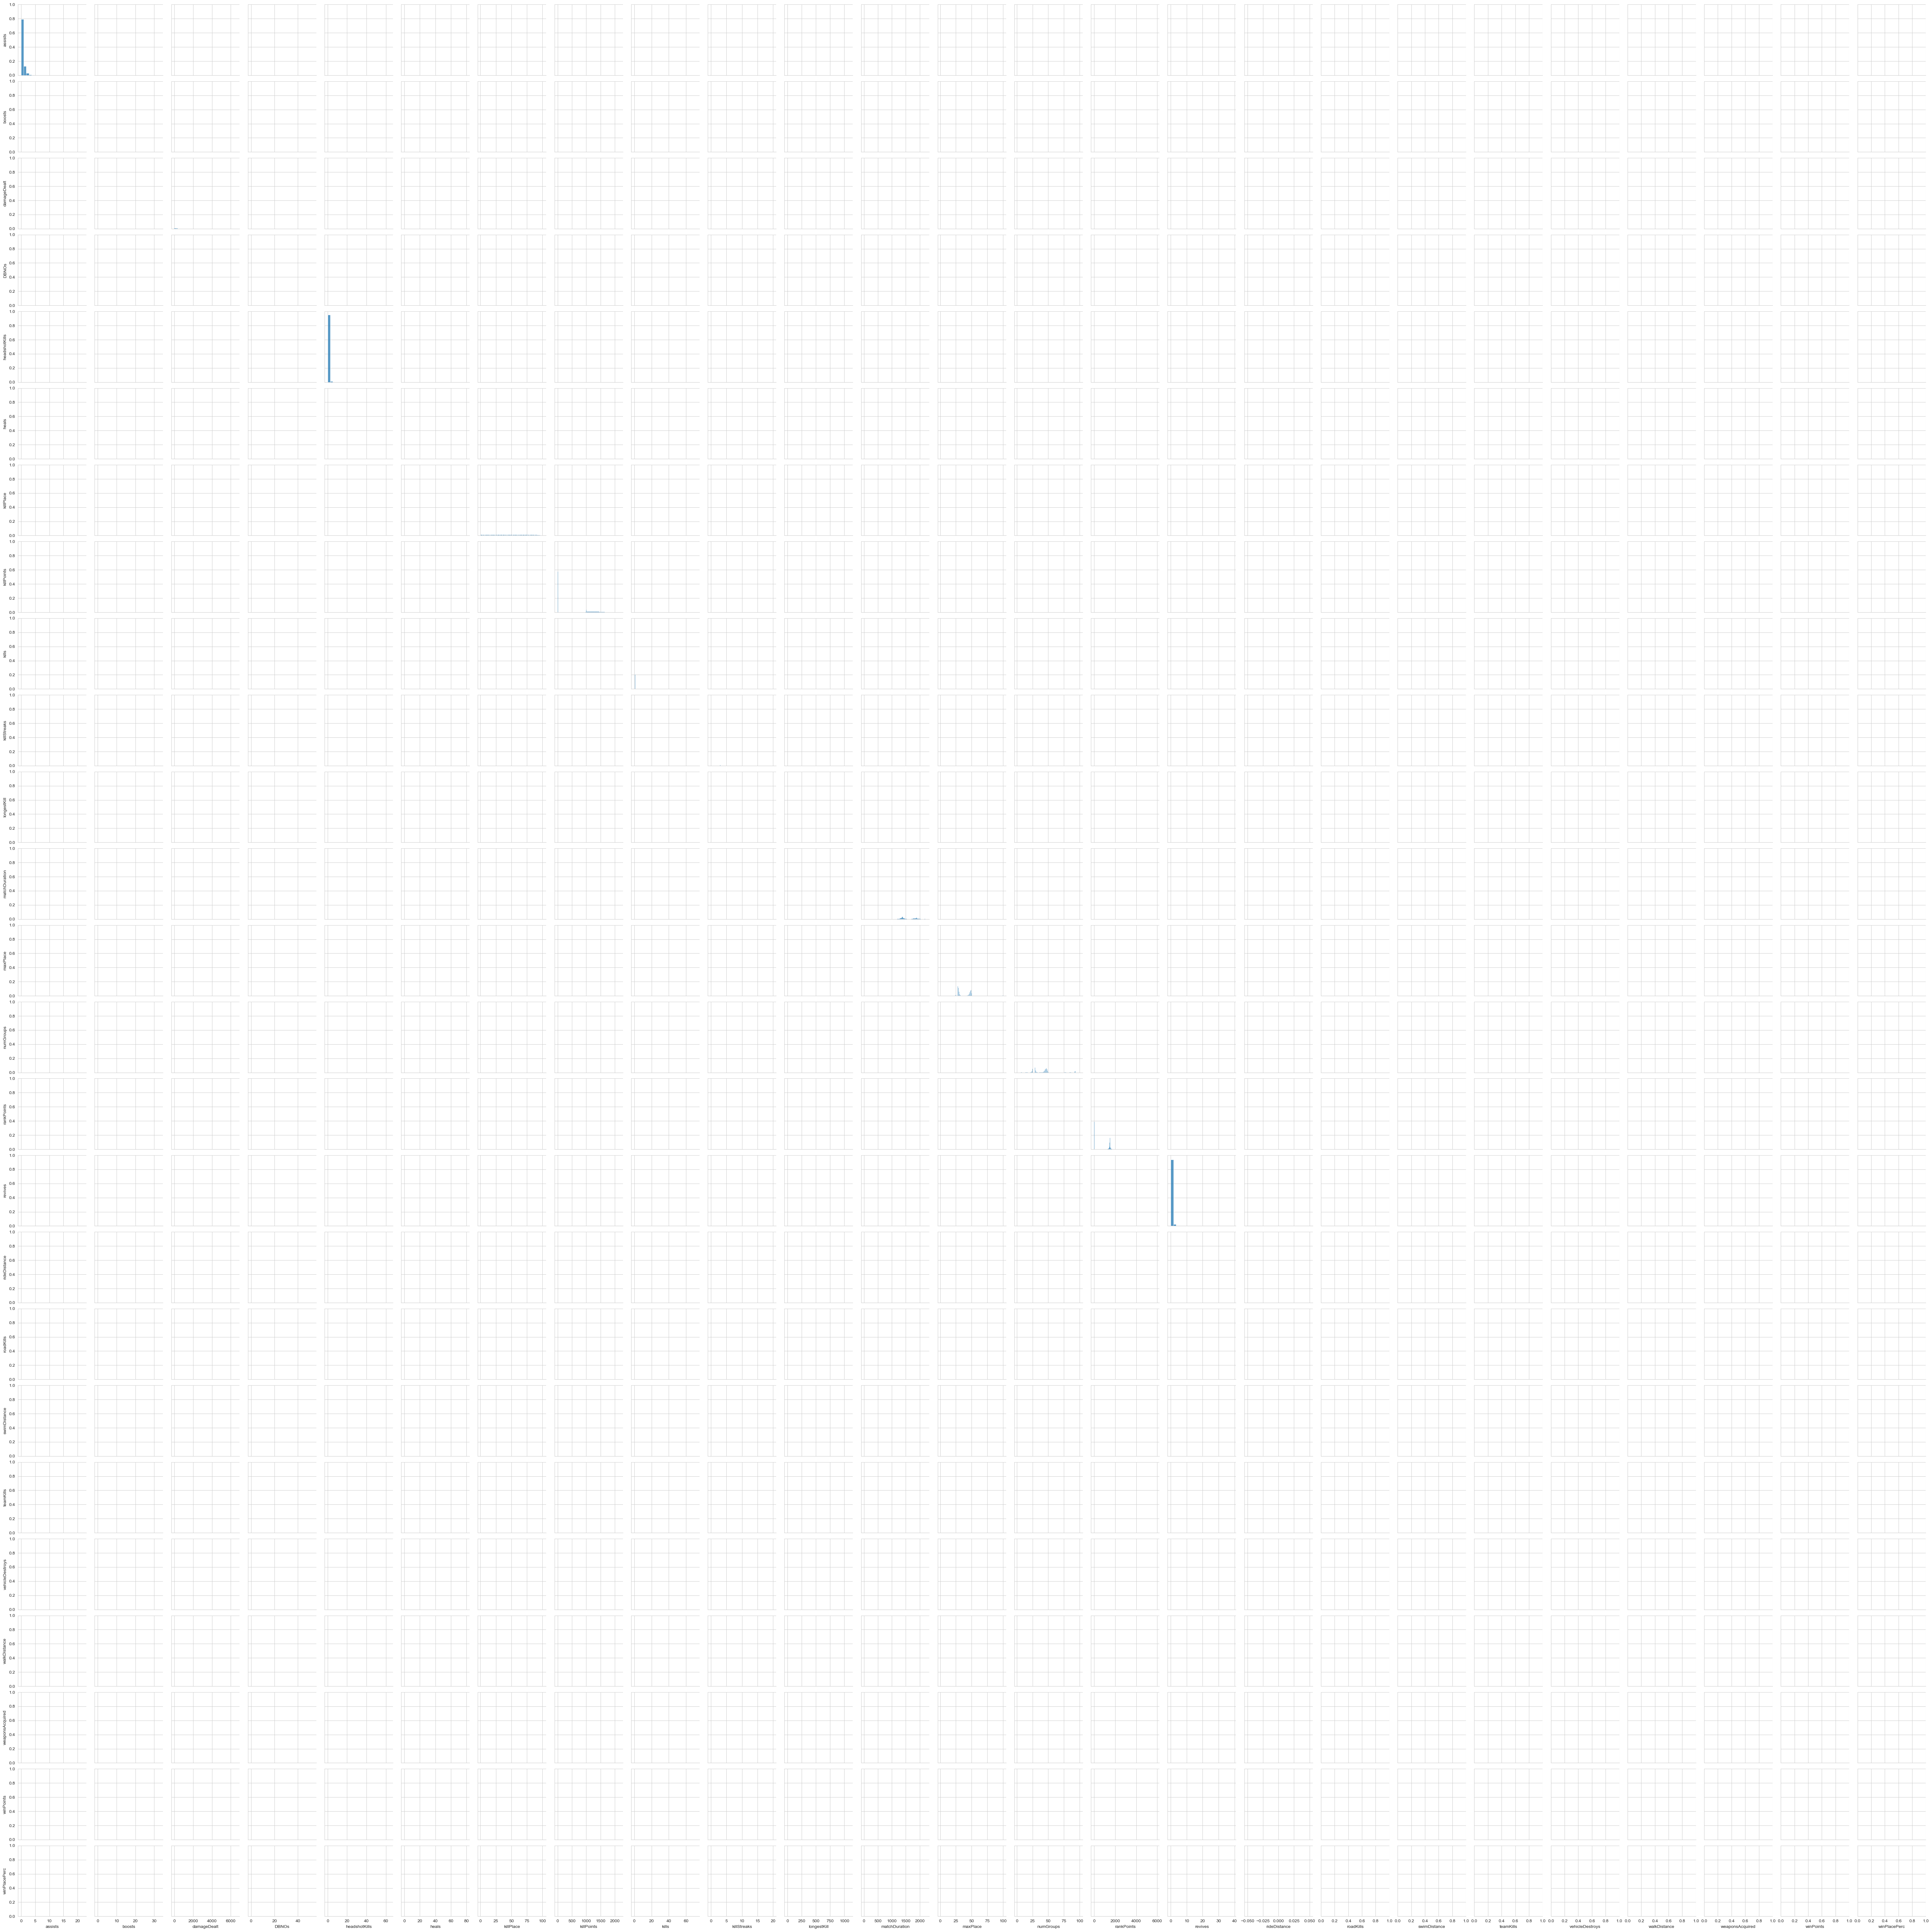

In [7]:
import seaborn as sns

sns.pairplot(trainDF)

In [94]:
import matplotlib.pyplot as plt

def visualize(col_name, matchtype, bin):
    title_name = col_name[0].upper() + col_name[1:]
    f, ax = plt.subplots()
    plt.xlabel(title_name)
    plt.ylabel('log Count')
    ax.set_yscale('log')
    matchtype.hist(column=col_name,ax=ax,bins=bin)
    plt.title('Histogram of ' + title_name)

    tmp = trainDF[col_name].value_counts().sort_values(ascending=False)

    print('Min value of ' + title_name + ' is: ',min(tmp.index))
    print('Max value of ' + title_name + ' is: ',max(tmp.index))


In [95]:
trainDF.dtypes != 'object'

Id                 False
groupId            False
matchId            False
assists             True
boosts              True
damageDealt         True
DBNOs               True
headshotKills       True
heals               True
killPlace           True
killPoints          True
kills               True
killStreaks         True
longestKill         True
matchDuration       True
matchType          False
maxPlace            True
numGroups           True
rankPoints          True
revives             True
rideDistance        True
roadKills           True
swimDistance        True
teamKills           True
vehicleDestroys     True
walkDistance        True
weaponsAcquired     True
winPoints           True
winPlacePerc        True
dtype: bool

In [96]:
trainDF_numeric = trainDF.loc[:, trainDF.dtypes != 'object']
trainDF_numeric

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


Min value of Assists is:  0
Max value of Assists is:  22


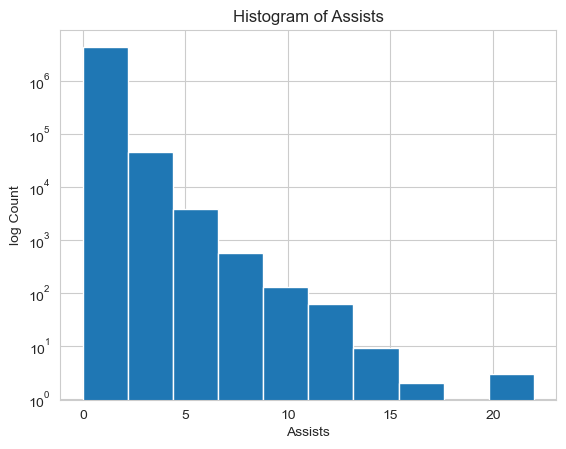

Min value of Boosts is:  0
Max value of Boosts is:  33


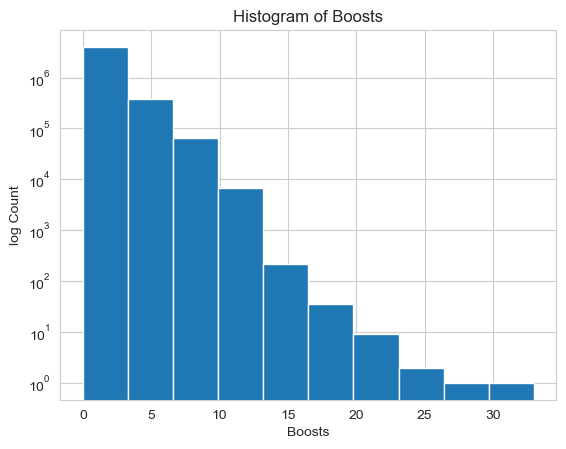

Min value of DamageDealt is:  0.0
Max value of DamageDealt is:  6616.0


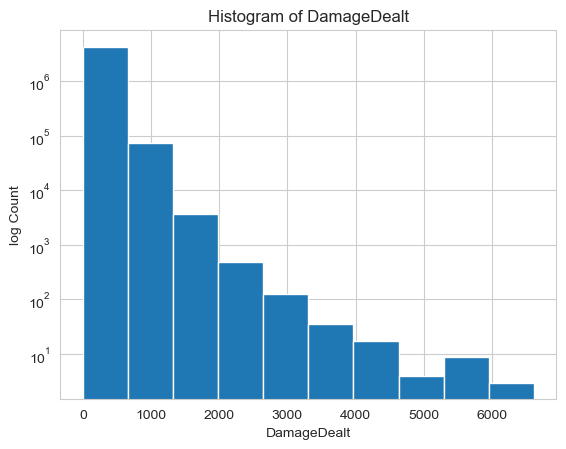

Min value of DBNOs is:  0
Max value of DBNOs is:  53


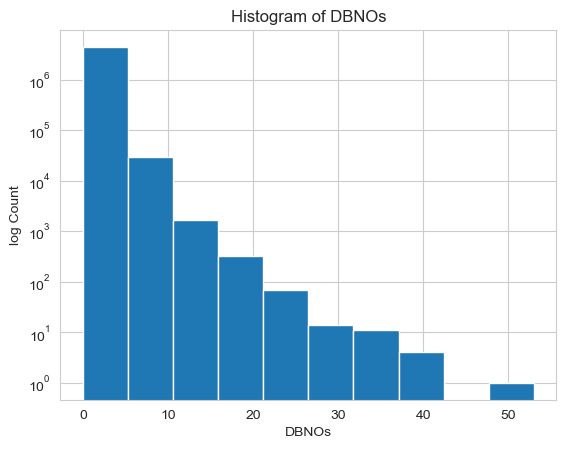

Min value of HeadshotKills is:  0
Max value of HeadshotKills is:  64


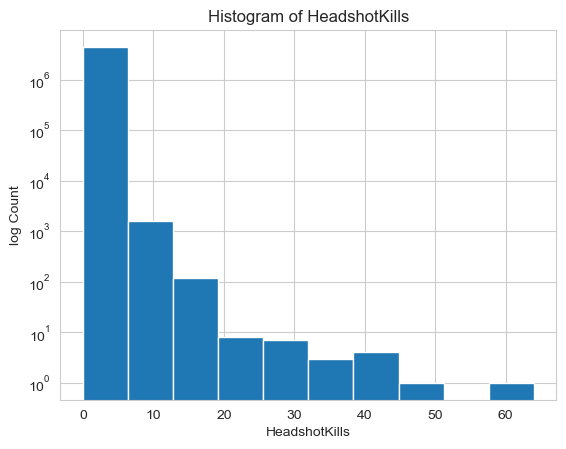

Min value of Heals is:  0
Max value of Heals is:  80


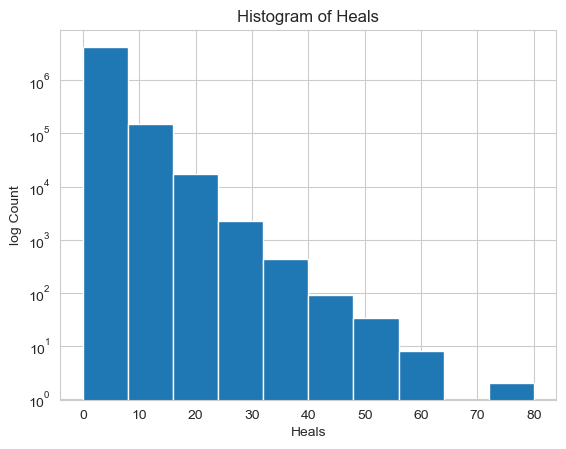

Min value of KillPlace is:  1
Max value of KillPlace is:  101


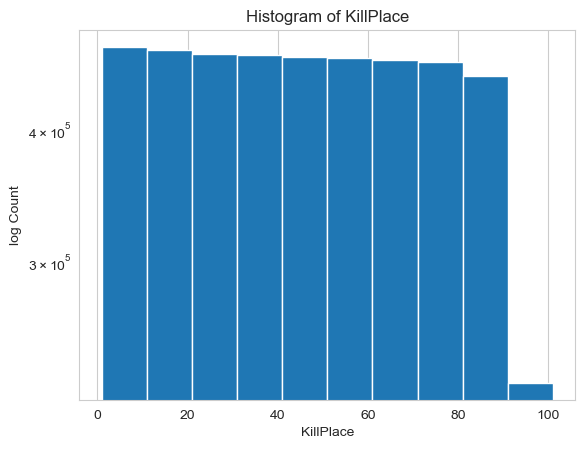

Min value of KillPoints is:  0
Max value of KillPoints is:  2170


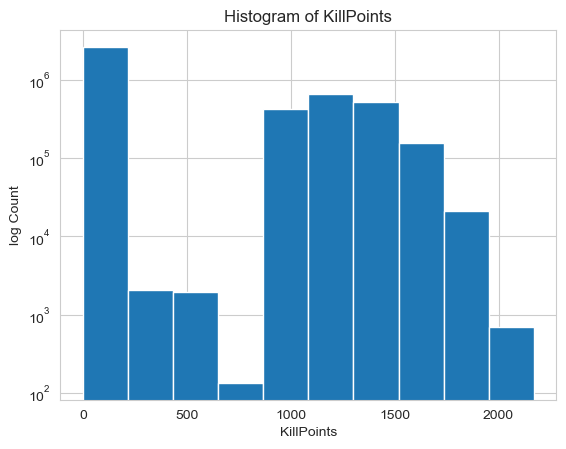

Min value of Kills is:  0
Max value of Kills is:  72


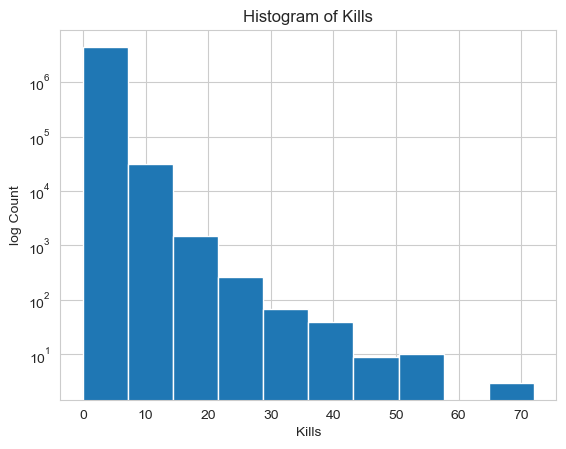

Min value of KillStreaks is:  0
Max value of KillStreaks is:  20


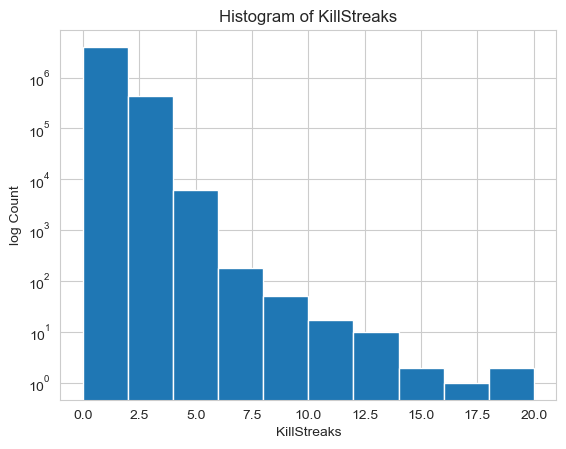

Min value of LongestKill is:  0.0
Max value of LongestKill is:  1094.0


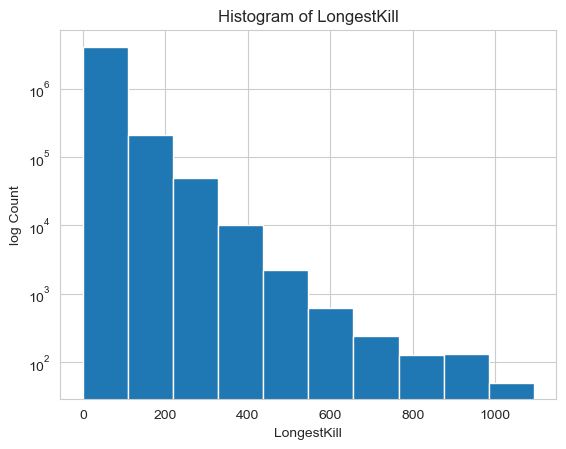

Min value of MatchDuration is:  9
Max value of MatchDuration is:  2237


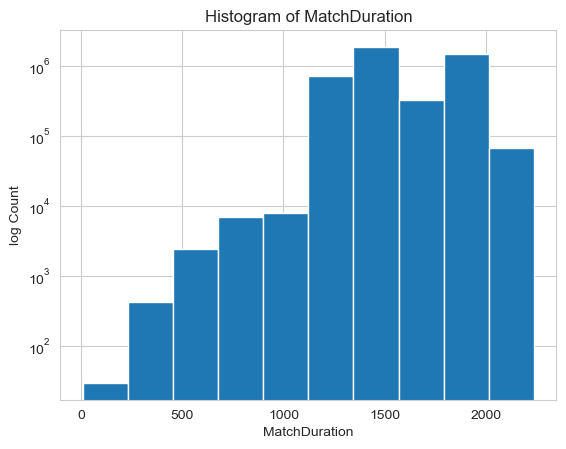

Min value of MaxPlace is:  1
Max value of MaxPlace is:  100


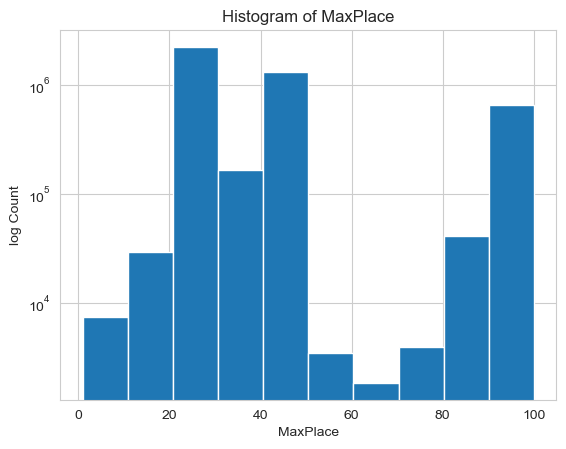

Min value of NumGroups is:  1
Max value of NumGroups is:  100


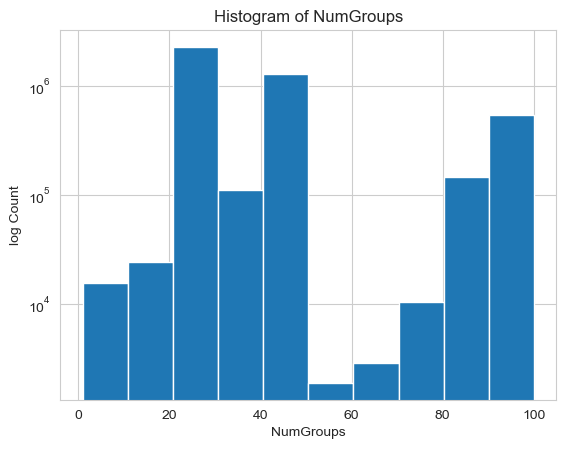

Min value of RankPoints is:  -1
Max value of RankPoints is:  5910


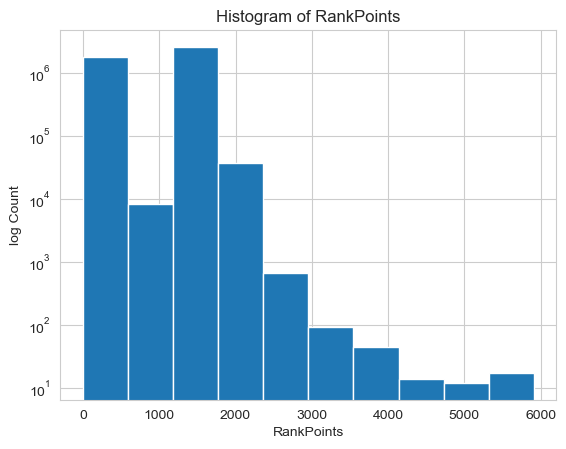

Min value of Revives is:  0
Max value of Revives is:  39


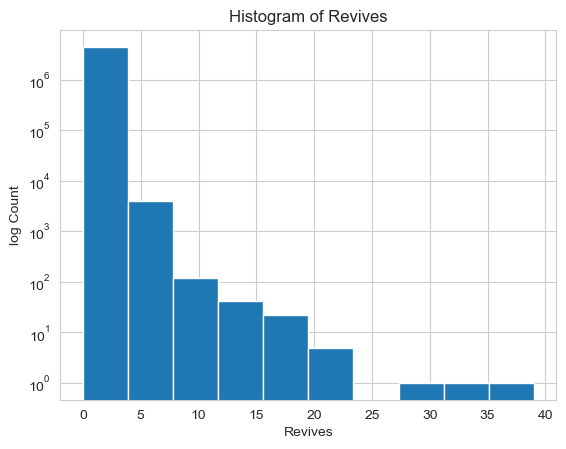

Min value of RideDistance is:  0.0
Max value of RideDistance is:  40710.0


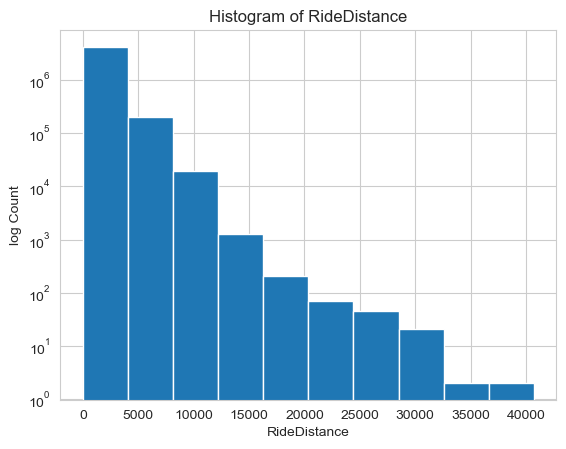

Min value of RoadKills is:  0
Max value of RoadKills is:  18


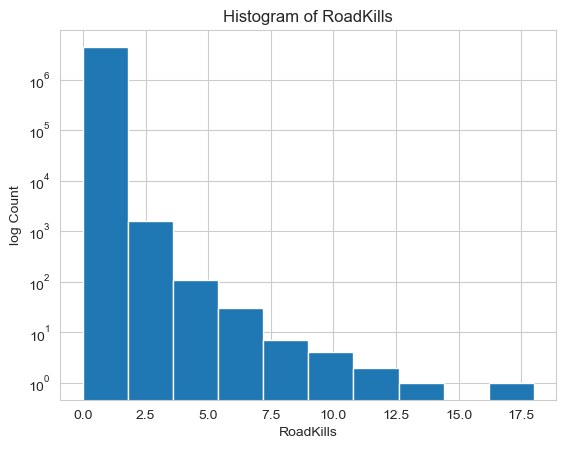

Min value of SwimDistance is:  0.0
Max value of SwimDistance is:  3823.0


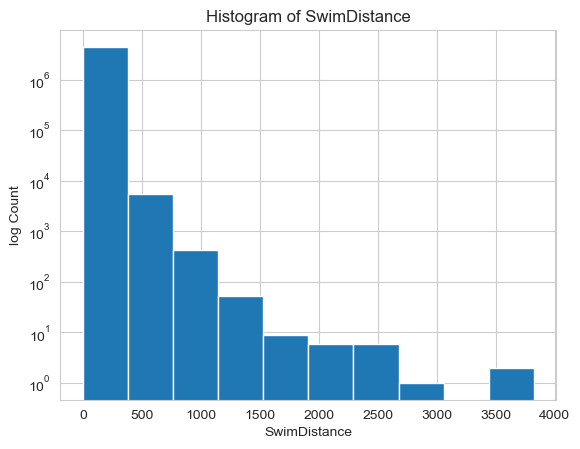

Min value of TeamKills is:  0
Max value of TeamKills is:  12


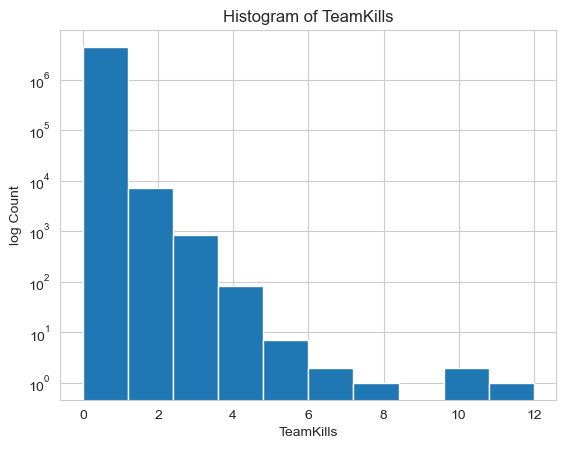

Min value of VehicleDestroys is:  0
Max value of VehicleDestroys is:  5


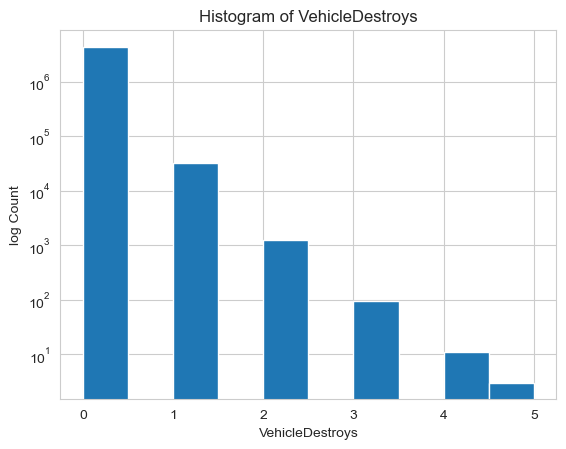

Min value of WalkDistance is:  0.0
Max value of WalkDistance is:  25780.0


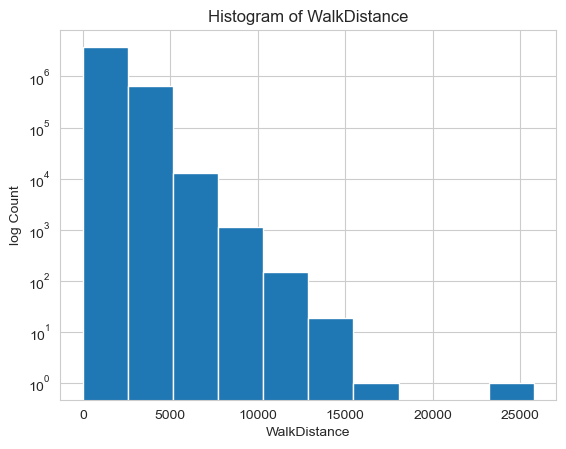

Min value of WeaponsAcquired is:  0
Max value of WeaponsAcquired is:  236


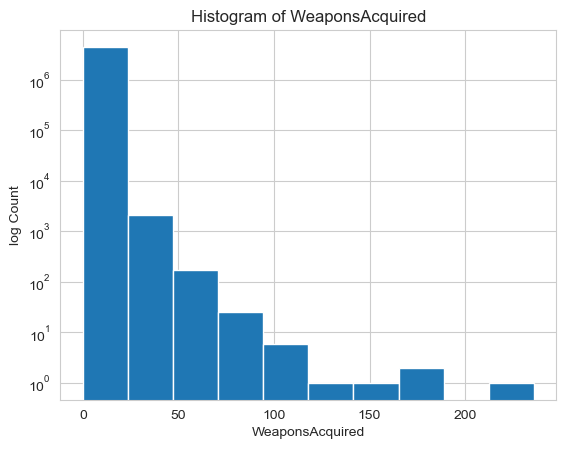

Min value of WinPoints is:  0
Max value of WinPoints is:  2013


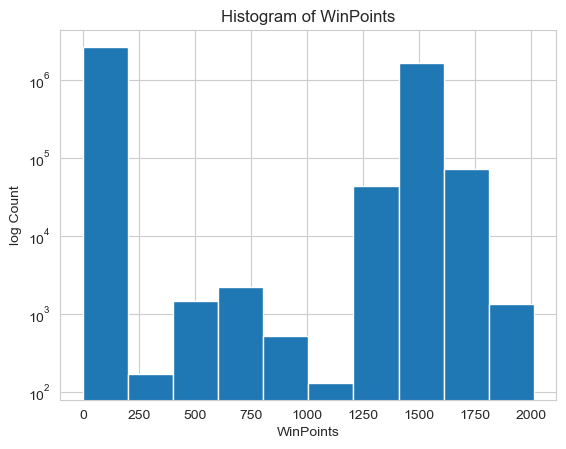

Min value of WinPlacePerc is:  0.0
Max value of WinPlacePerc is:  1.0


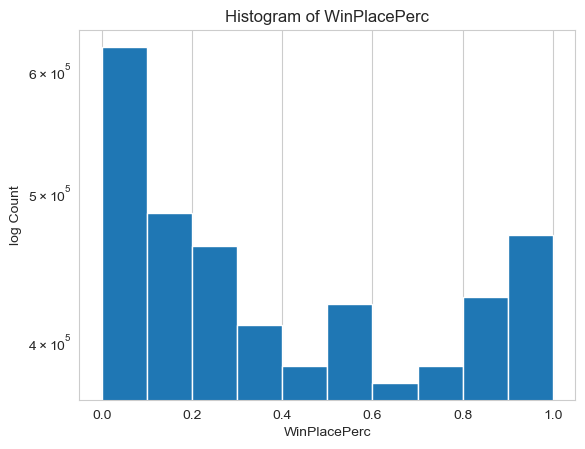

In [97]:
for i in trainDF_numeric.columns:
    visualize(i, trainDF, 10)
    plt.show()

Min value of Assists is:  0
Max value of Assists is:  22


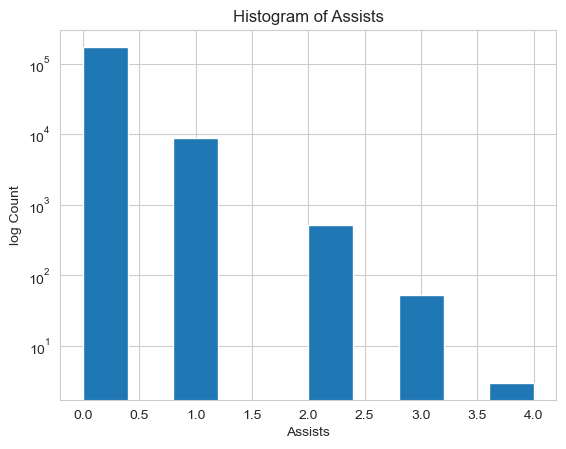

Min value of Boosts is:  0
Max value of Boosts is:  33


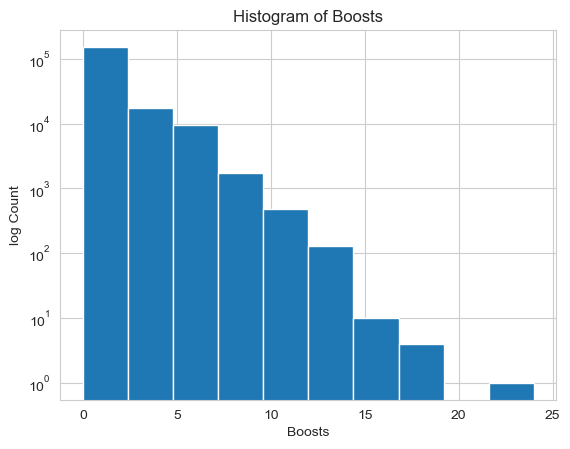

Min value of DamageDealt is:  0.0
Max value of DamageDealt is:  6616.0


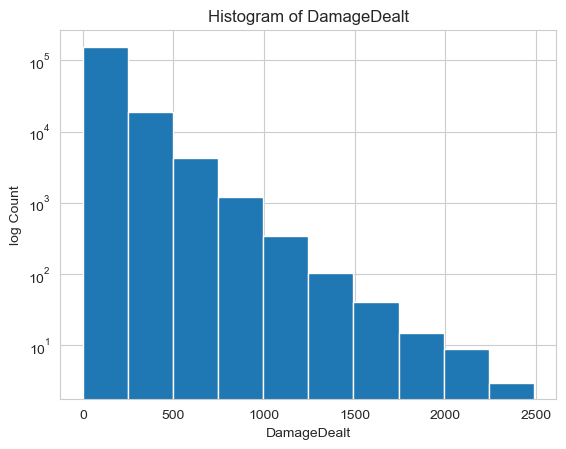

Min value of DBNOs is:  0
Max value of DBNOs is:  53


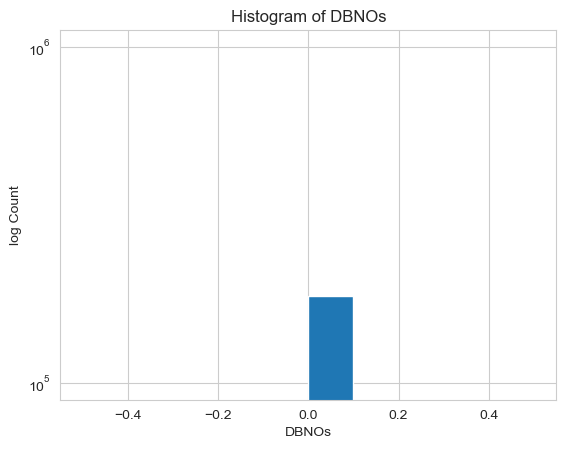

Min value of HeadshotKills is:  0
Max value of HeadshotKills is:  64


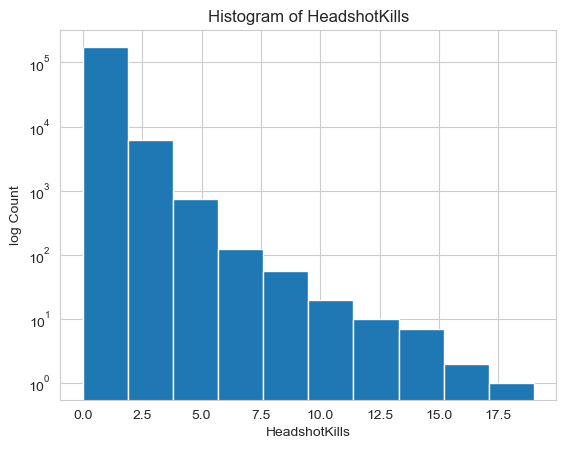

Min value of Heals is:  0
Max value of Heals is:  80


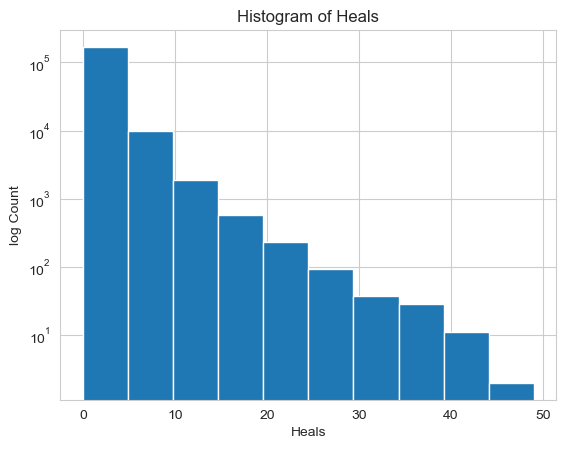

Min value of KillPlace is:  1
Max value of KillPlace is:  101


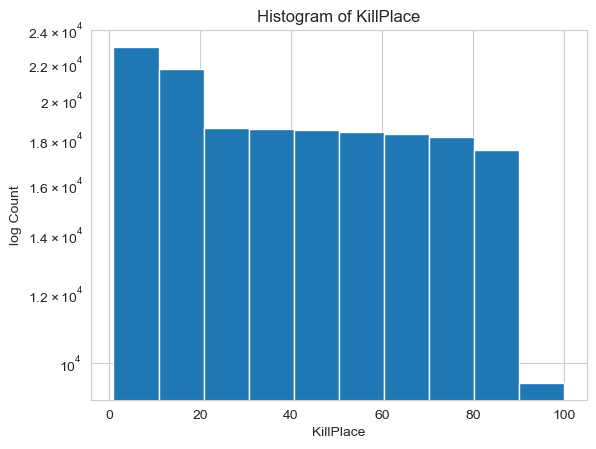

Min value of KillPoints is:  0
Max value of KillPoints is:  2170


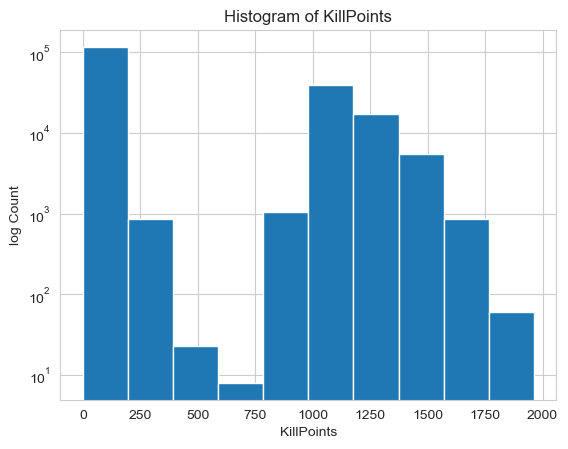

Min value of Kills is:  0
Max value of Kills is:  72


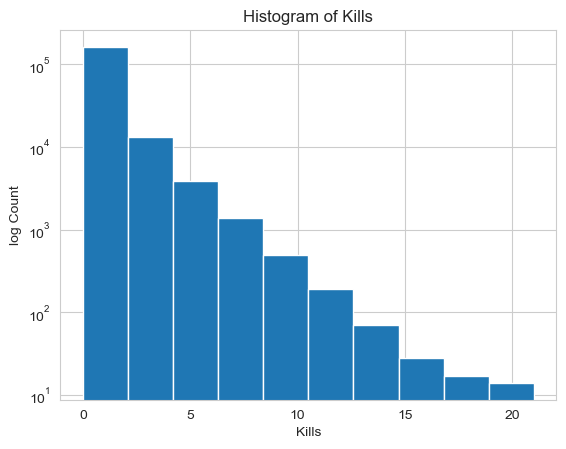

Min value of KillStreaks is:  0
Max value of KillStreaks is:  20


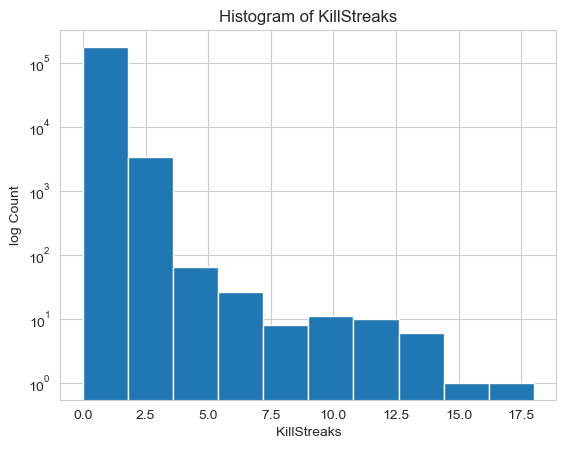

Min value of LongestKill is:  0.0
Max value of LongestKill is:  1094.0


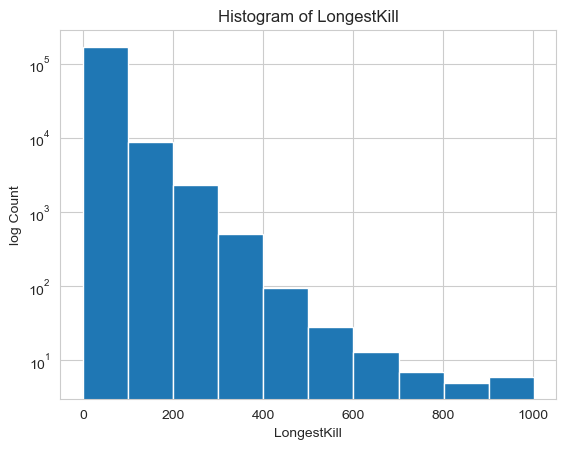

Min value of MatchDuration is:  9
Max value of MatchDuration is:  2237


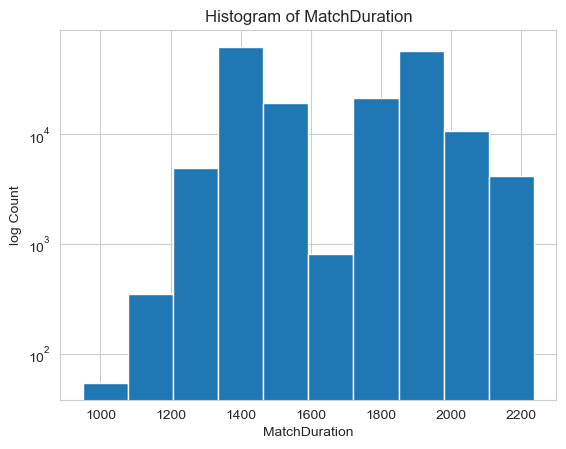

Min value of MaxPlace is:  1
Max value of MaxPlace is:  100


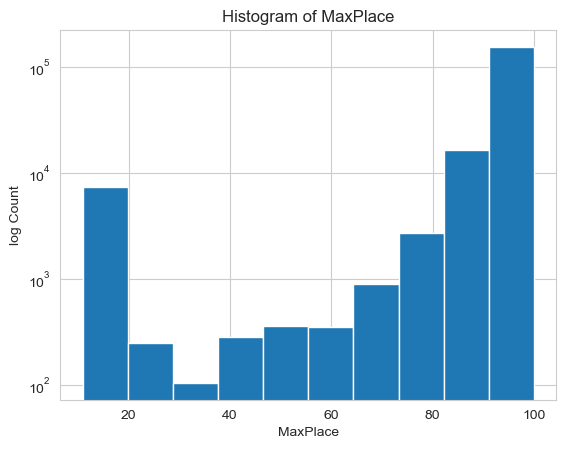

Min value of NumGroups is:  1
Max value of NumGroups is:  100


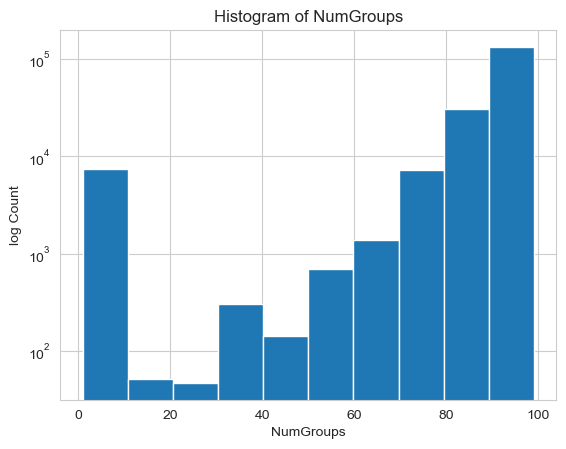

Min value of RankPoints is:  -1
Max value of RankPoints is:  5910


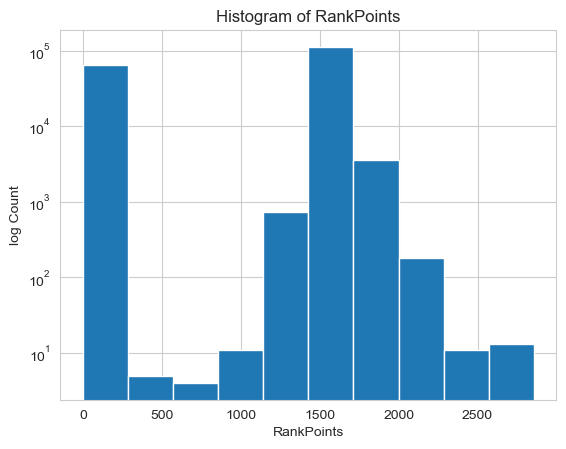

Min value of Revives is:  0
Max value of Revives is:  39


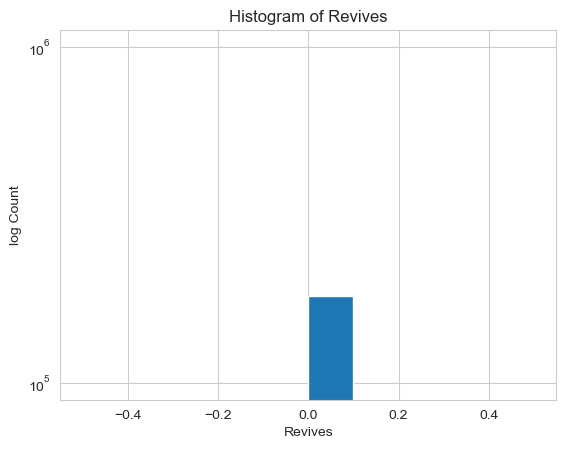

Min value of RideDistance is:  0.0
Max value of RideDistance is:  40710.0


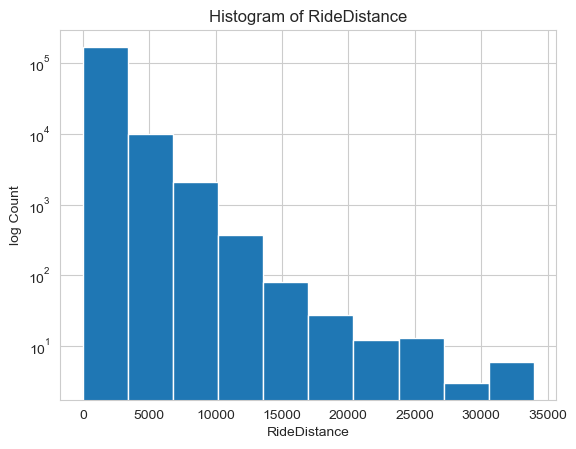

Min value of RoadKills is:  0
Max value of RoadKills is:  18


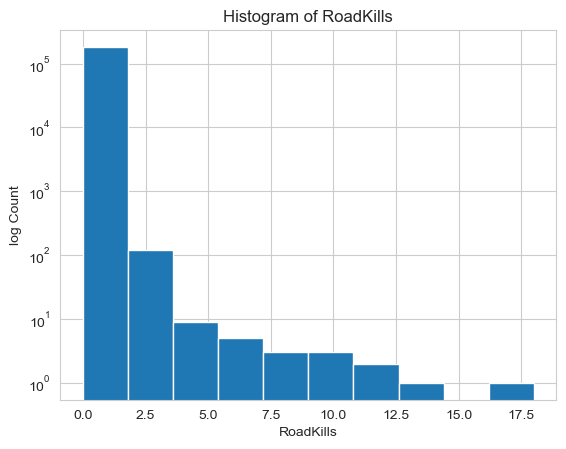

Min value of SwimDistance is:  0.0
Max value of SwimDistance is:  3823.0


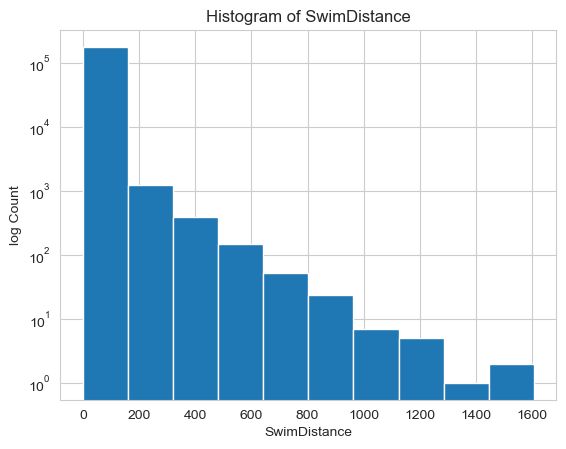

Min value of TeamKills is:  0
Max value of TeamKills is:  12


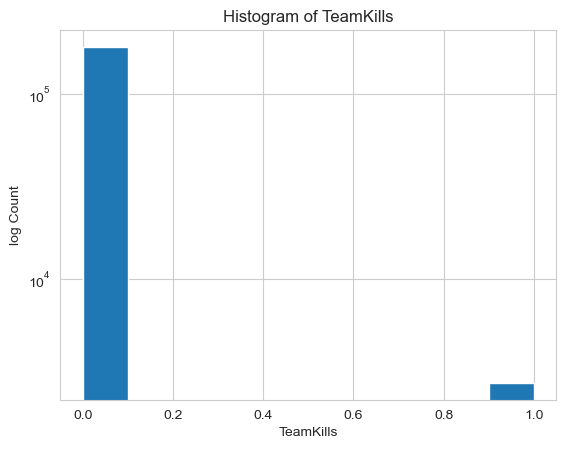

Min value of VehicleDestroys is:  0
Max value of VehicleDestroys is:  5


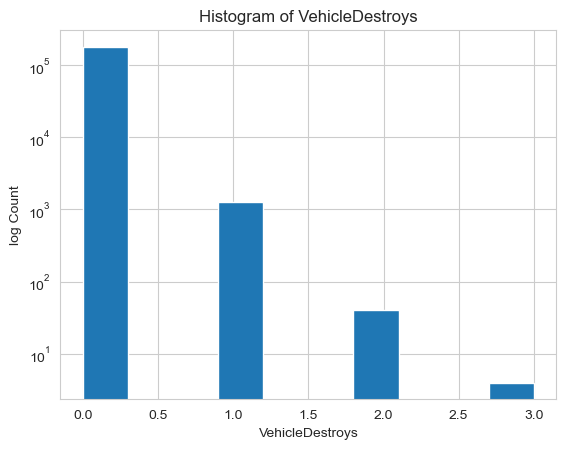

Min value of WalkDistance is:  0.0
Max value of WalkDistance is:  25780.0


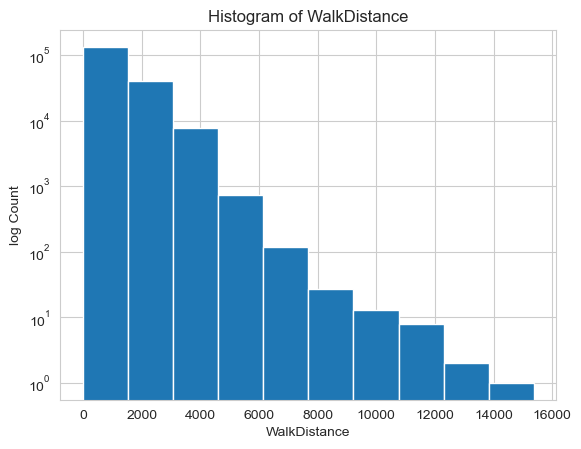

Min value of WeaponsAcquired is:  0
Max value of WeaponsAcquired is:  236


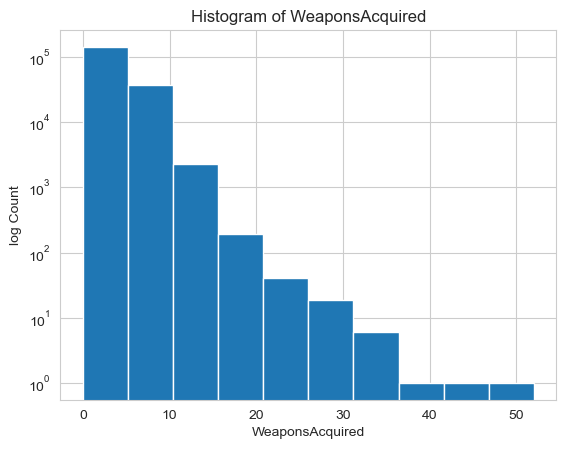

Min value of WinPoints is:  0
Max value of WinPoints is:  2013


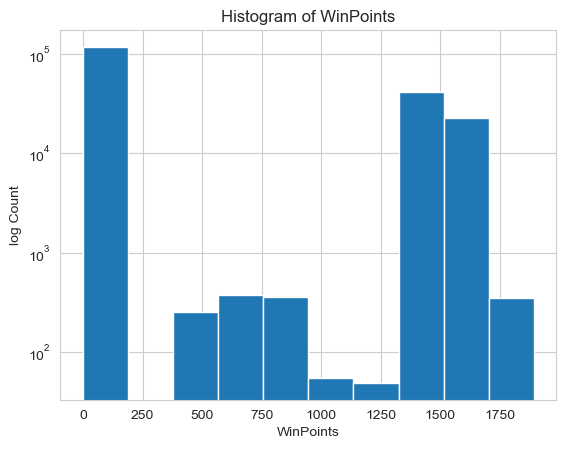

Min value of WinPlacePerc is:  0.0
Max value of WinPlacePerc is:  1.0


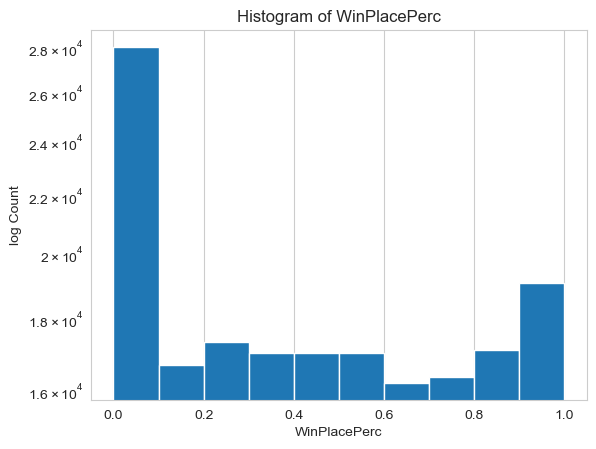

In [98]:
for i in trainDF_numeric.columns:
    visualize(i, soloDF, 10)
    plt.show()

In [99]:
soloDF.teamKills.unique()

array([0, 1])

In [100]:
soloDF[soloDF['teamKills']==1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5142,6d53f6f4b73d93,d904210c13c5c0,8ac415d9a9d18f,0,0,0.00,0,0,0,44,...,0,4304.0,0,0.0,1,0,1516.0,5,0,0.6163
9259,9ddaa83af7f1fc,42e1ef67cce27c,095fb49124b351,0,2,156.70,0,1,0,26,...,0,3019.0,0,0.0,1,0,1134.0,5,0,0.5368
9346,4d8dbe0d553c6a,9a3ca12999b5c6,00efee3dd33d5f,0,0,100.00,0,0,0,54,...,0,0.0,0,0.0,1,0,1091.0,4,1539,0.6082
10108,e92f92ce2a2e7e,a545054538f354,84cce11c31de50,0,1,0.00,0,0,0,56,...,0,5905.0,0,0.0,1,0,686.2,4,0,0.5484
12955,3c72843f8e4eeb,ec8a0ceff11bf9,0c604c9981d022,1,3,399.50,0,1,0,6,...,0,0.0,0,0.0,1,0,2144.0,7,0,0.8696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440605,f8439f76447fc1,a1f9cf8805e8d2,b59836dc91dfc2,0,2,92.38,0,0,1,26,...,0,234.9,0,0.0,1,0,1705.0,8,0,0.7551
4442342,c801daa3c6f9c0,f4039e40a197be,1f797f7701413b,0,1,0.00,0,0,3,52,...,0,520.7,0,334.6,1,0,2025.0,4,0,0.6774
4444871,ddc25272857f1c,2d74499d425bcb,aca59f122ef49b,0,1,280.80,0,1,1,21,...,0,772.3,0,0.0,1,1,850.3,6,1441,0.5102
4446354,acef85c60d3483,209ec5f18b55cc,8a49e341330497,0,2,44.00,0,0,0,54,...,0,0.0,0,0.0,1,0,1249.0,3,0,0.6421


In [101]:
soloDF[soloDF['teamKills']==1].shape[0] / soloDF.shape[0]

# 1.49%
# 자살 = 자기장, 물빠짐, 수류탄 자폭 등으로 추정.                  

0.014993706820267886

Min value of Assists is:  0
Max value of Assists is:  22
Min value of Assists is:  0
Max value of Assists is:  22


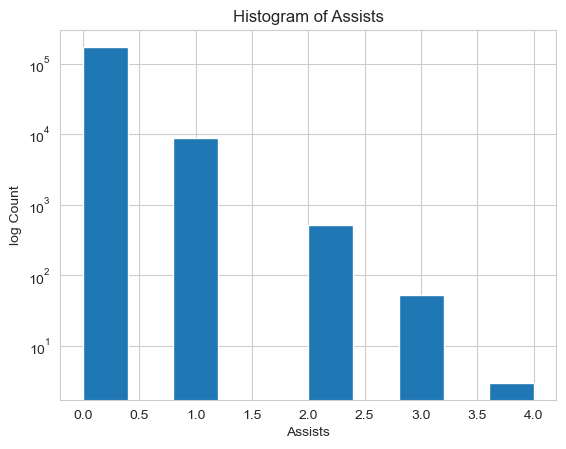

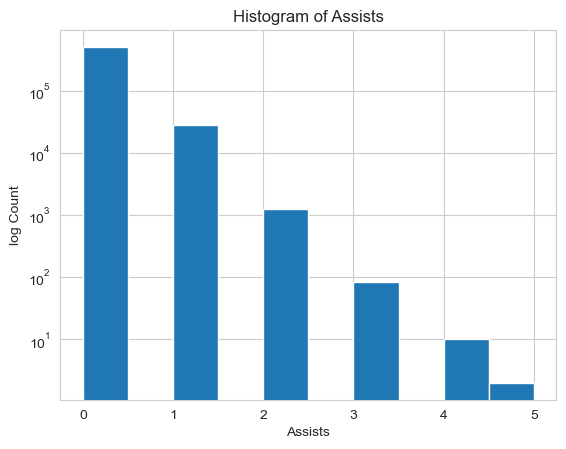

Min value of Boosts is:  0
Max value of Boosts is:  33
Min value of Boosts is:  0
Max value of Boosts is:  33


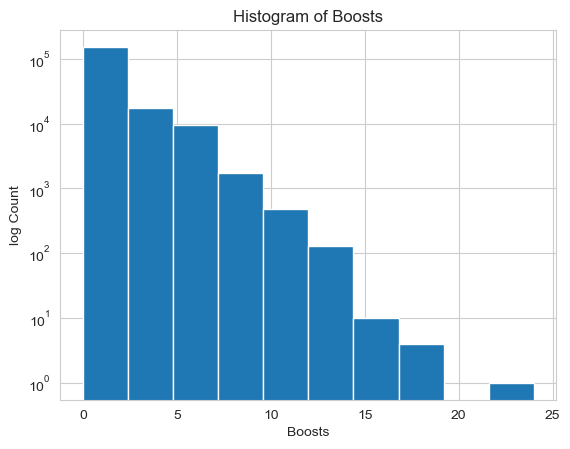

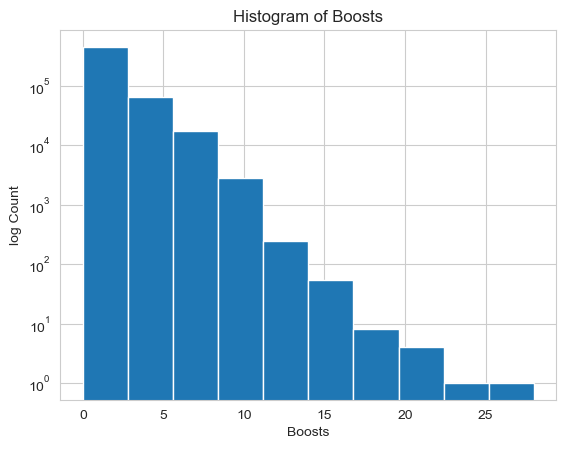

Min value of DamageDealt is:  0.0
Max value of DamageDealt is:  6616.0
Min value of DamageDealt is:  0.0
Max value of DamageDealt is:  6616.0


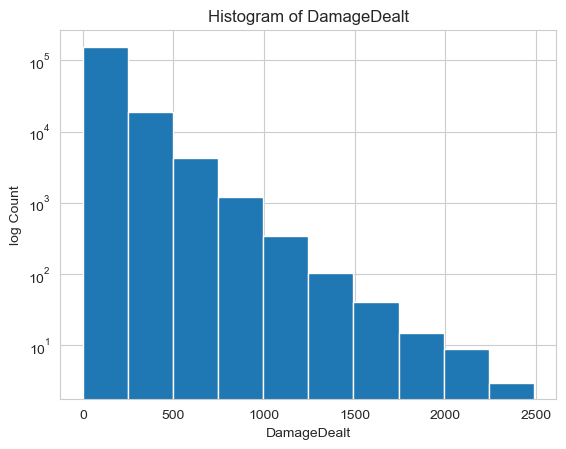

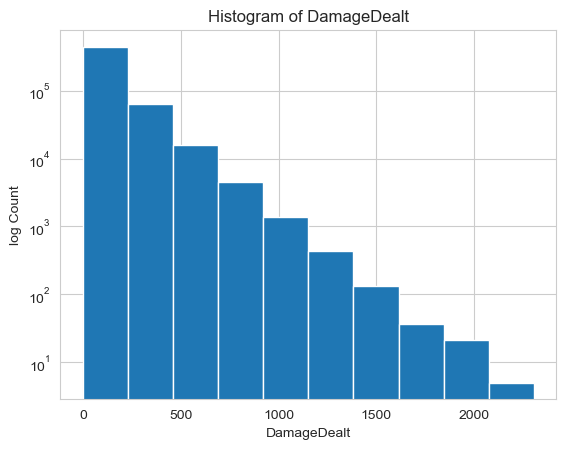

Min value of DBNOs is:  0
Max value of DBNOs is:  53
Min value of DBNOs is:  0
Max value of DBNOs is:  53


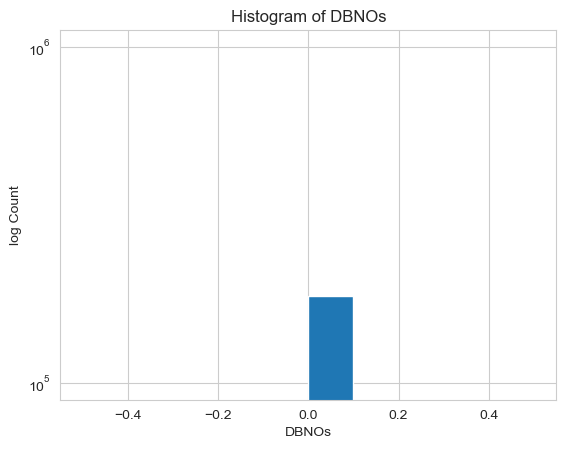

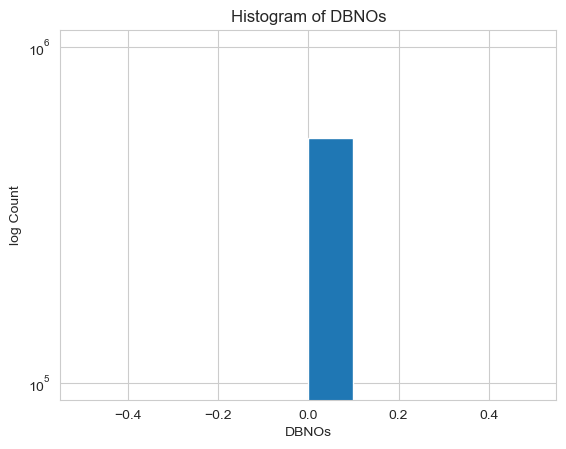

Min value of HeadshotKills is:  0
Max value of HeadshotKills is:  64
Min value of HeadshotKills is:  0
Max value of HeadshotKills is:  64


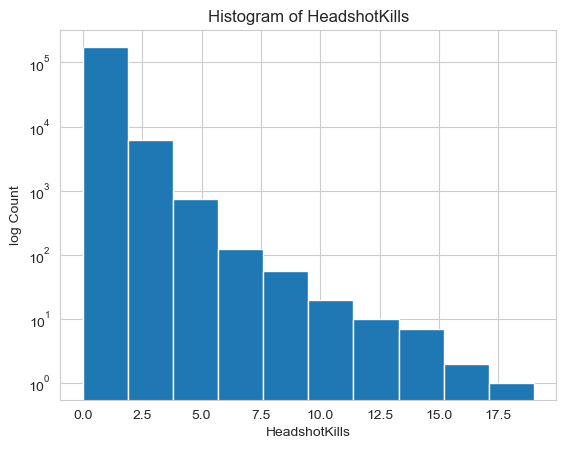

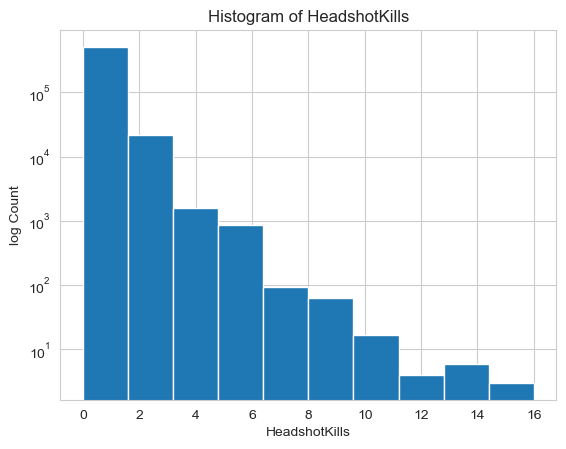

Min value of Heals is:  0
Max value of Heals is:  80
Min value of Heals is:  0
Max value of Heals is:  80


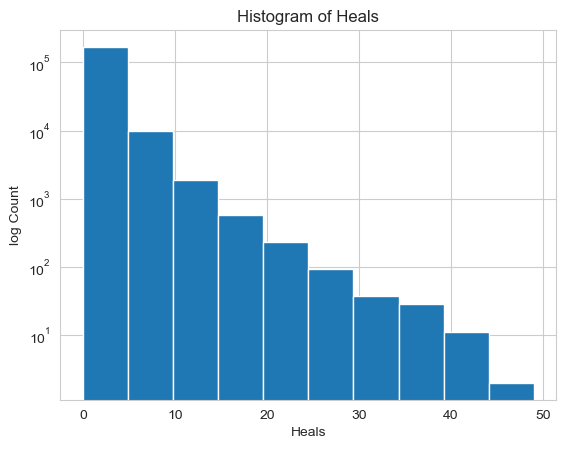

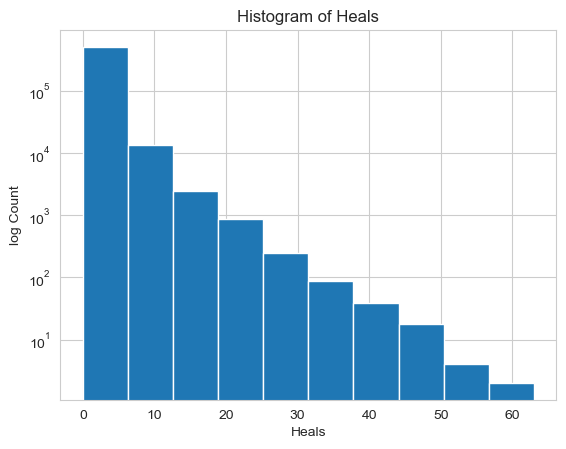

Min value of KillPlace is:  1
Max value of KillPlace is:  101
Min value of KillPlace is:  1
Max value of KillPlace is:  101


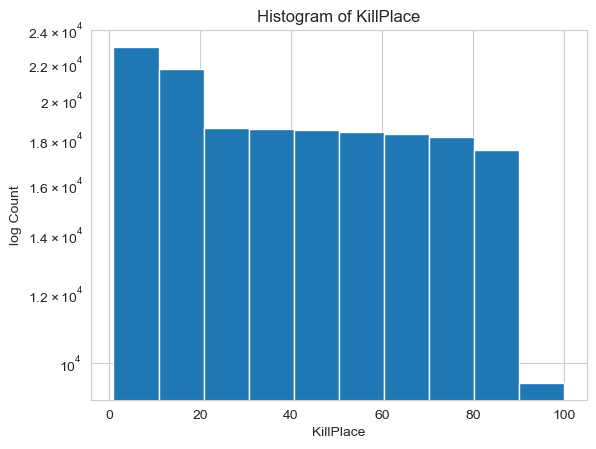

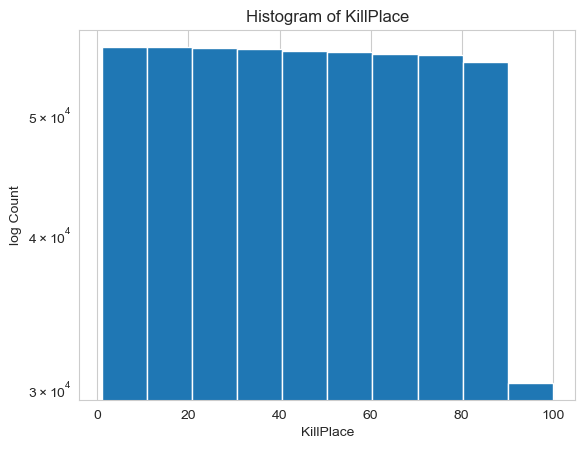

Min value of KillPoints is:  0
Max value of KillPoints is:  2170
Min value of KillPoints is:  0
Max value of KillPoints is:  2170


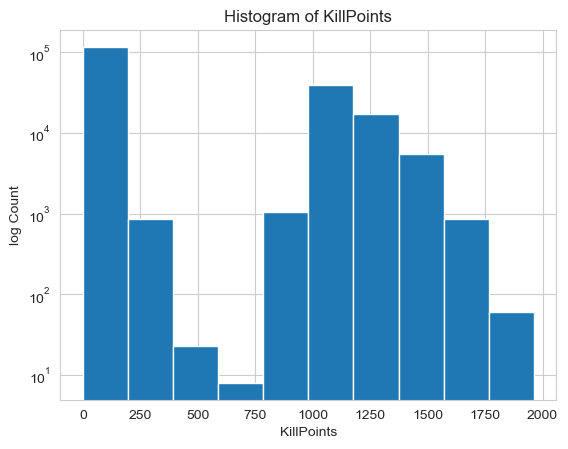

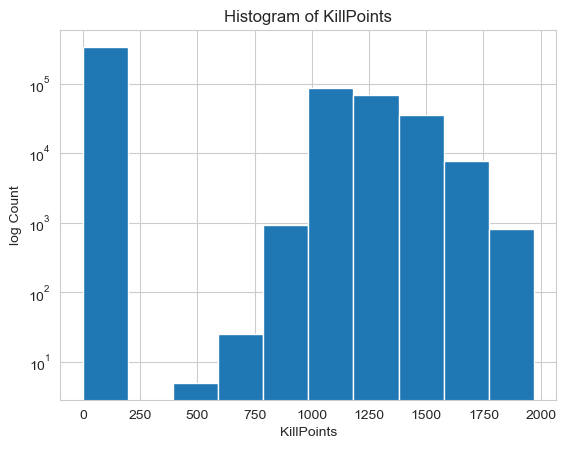

Min value of Kills is:  0
Max value of Kills is:  72
Min value of Kills is:  0
Max value of Kills is:  72


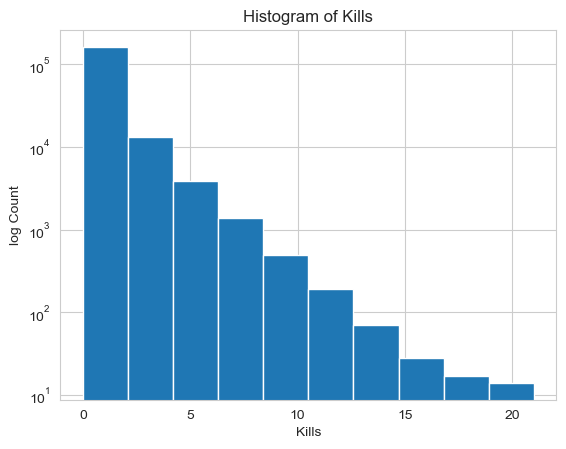

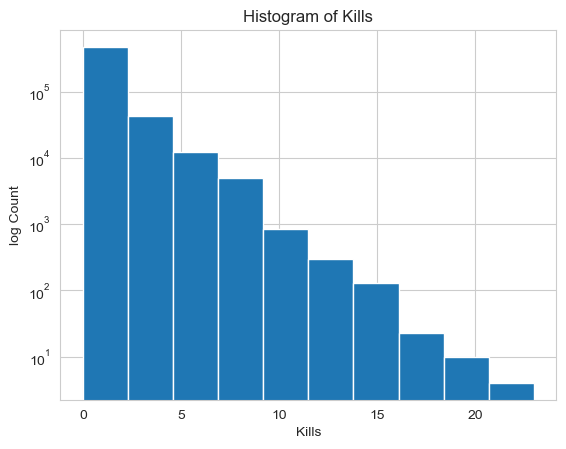

Min value of KillStreaks is:  0
Max value of KillStreaks is:  20
Min value of KillStreaks is:  0
Max value of KillStreaks is:  20


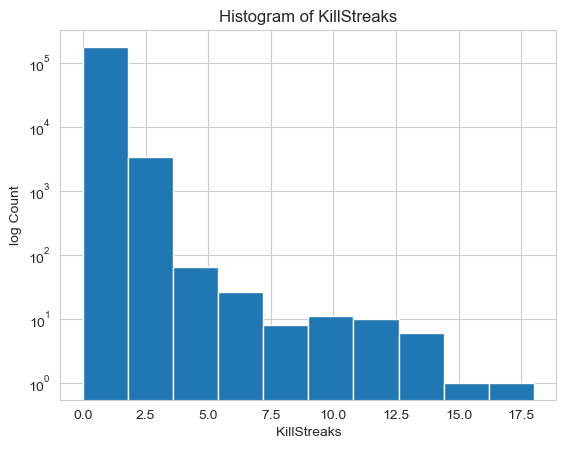

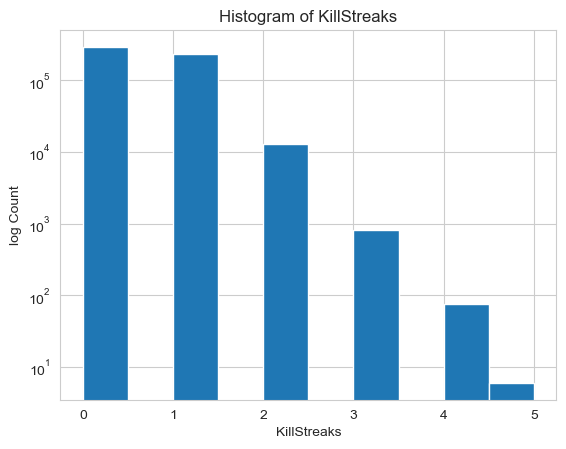

Min value of LongestKill is:  0.0
Max value of LongestKill is:  1094.0
Min value of LongestKill is:  0.0
Max value of LongestKill is:  1094.0


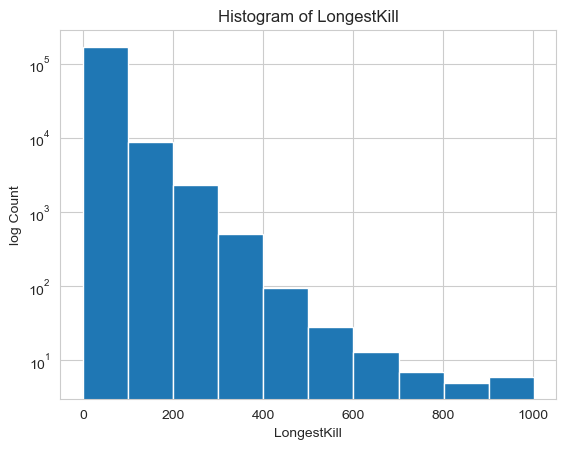

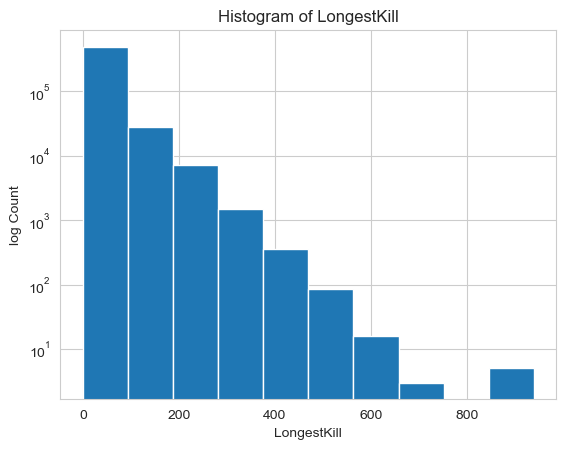

Min value of MatchDuration is:  9
Max value of MatchDuration is:  2237
Min value of MatchDuration is:  9
Max value of MatchDuration is:  2237


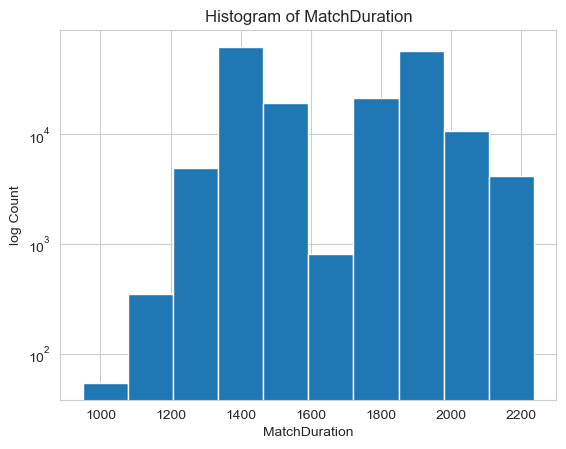

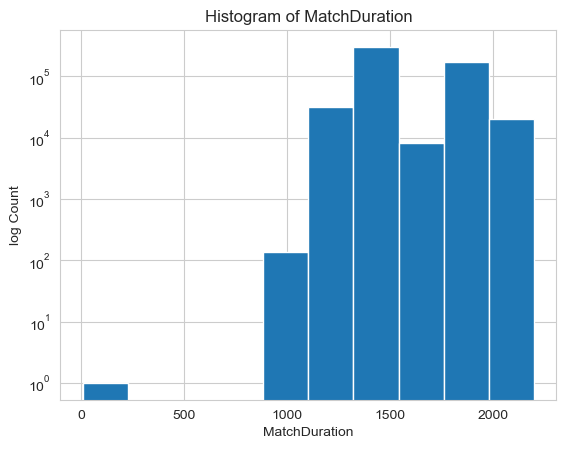

Min value of MaxPlace is:  1
Max value of MaxPlace is:  100
Min value of MaxPlace is:  1
Max value of MaxPlace is:  100


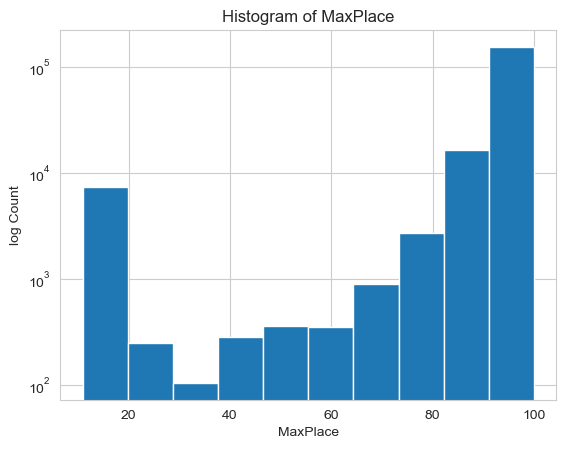

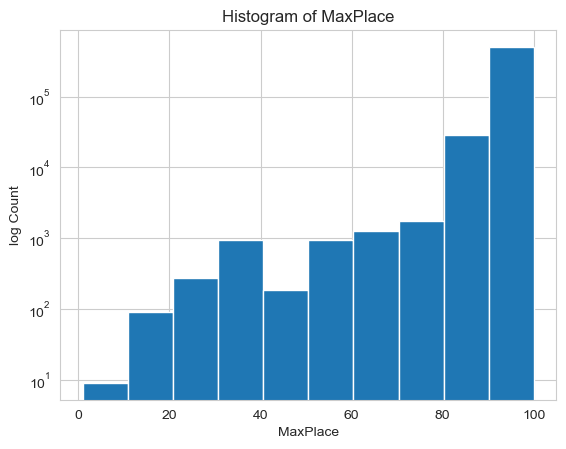

Min value of NumGroups is:  1
Max value of NumGroups is:  100
Min value of NumGroups is:  1
Max value of NumGroups is:  100


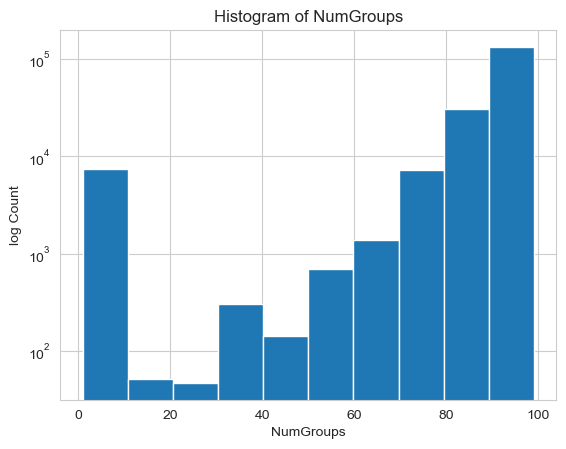

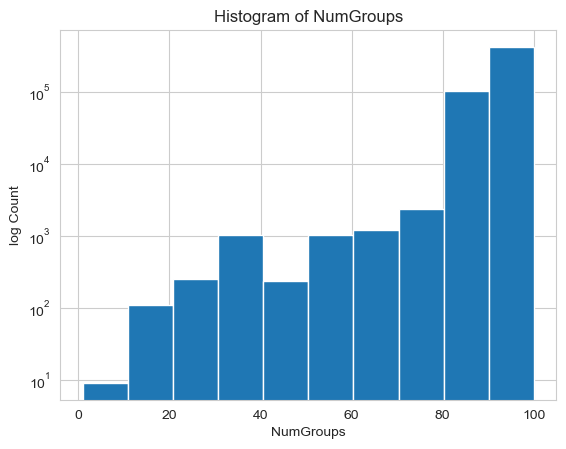

Min value of RankPoints is:  -1
Max value of RankPoints is:  5910
Min value of RankPoints is:  -1
Max value of RankPoints is:  5910


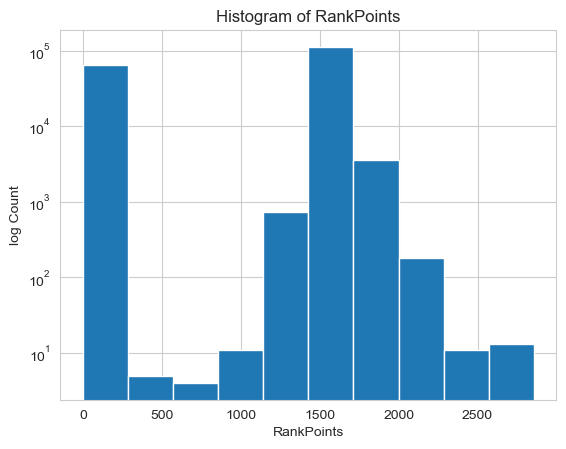

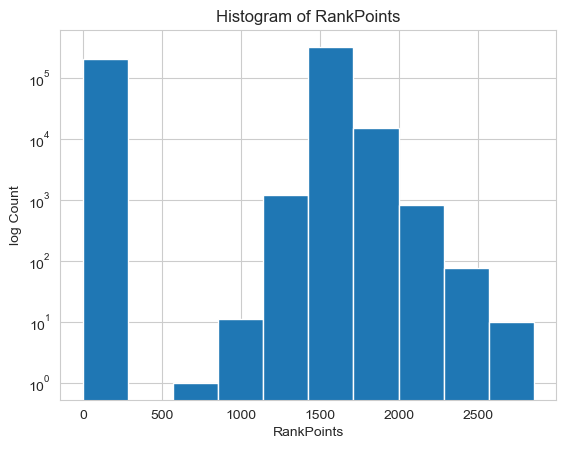

Min value of Revives is:  0
Max value of Revives is:  39
Min value of Revives is:  0
Max value of Revives is:  39


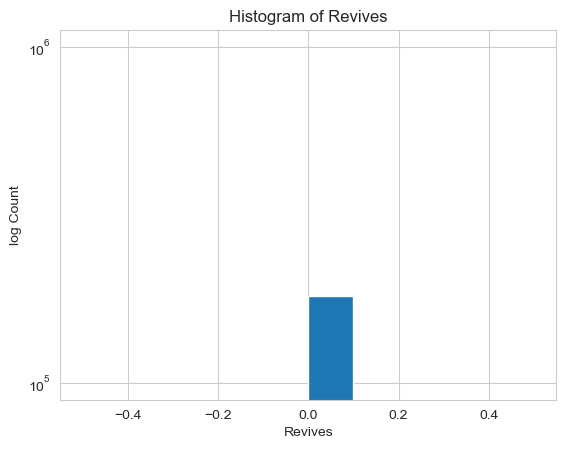

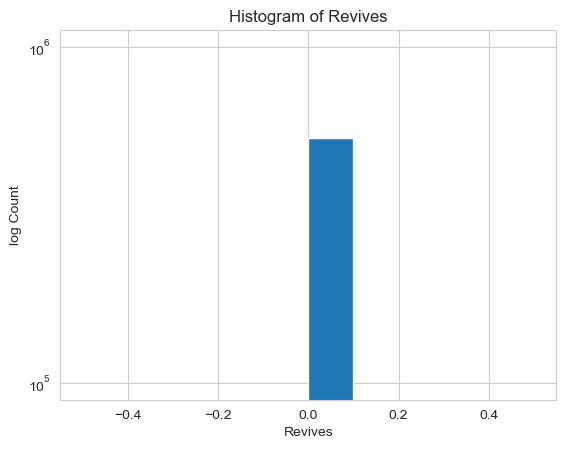

Min value of RideDistance is:  0.0
Max value of RideDistance is:  40710.0
Min value of RideDistance is:  0.0
Max value of RideDistance is:  40710.0


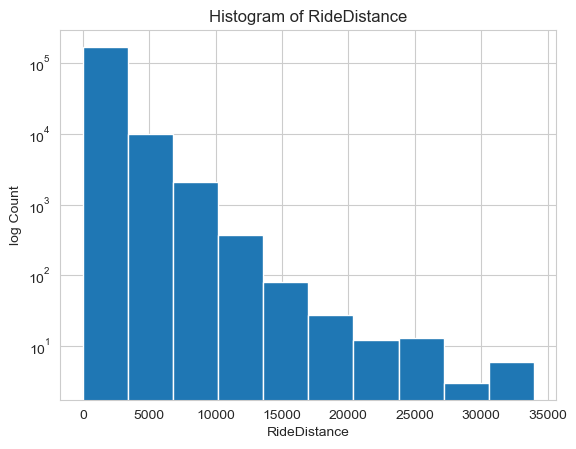

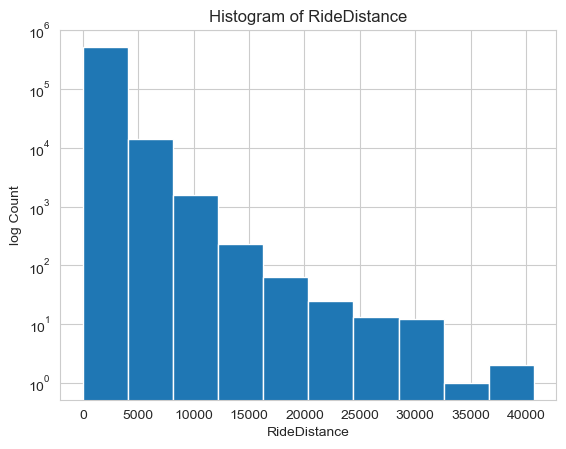

Min value of RoadKills is:  0
Max value of RoadKills is:  18
Min value of RoadKills is:  0
Max value of RoadKills is:  18


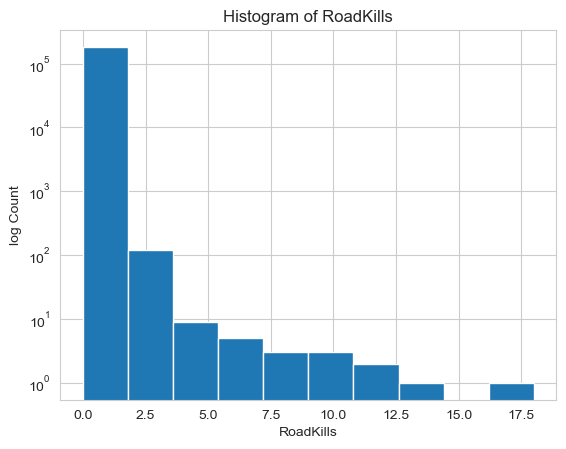

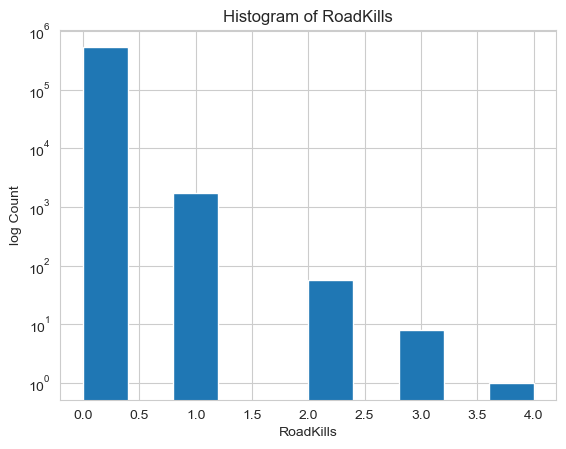

Min value of SwimDistance is:  0.0
Max value of SwimDistance is:  3823.0
Min value of SwimDistance is:  0.0
Max value of SwimDistance is:  3823.0


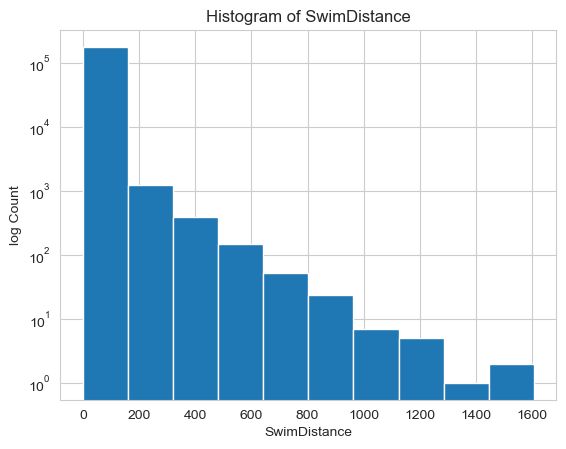

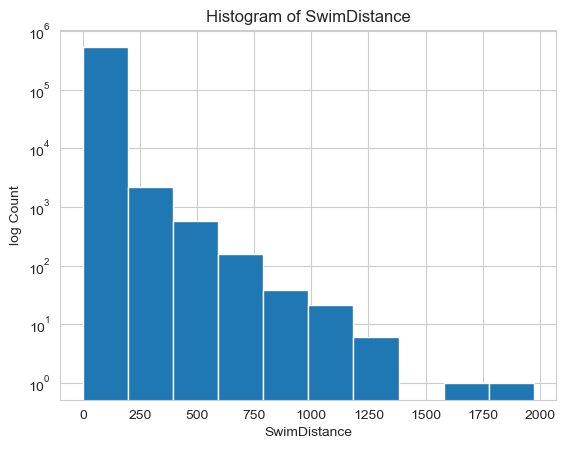

Min value of TeamKills is:  0
Max value of TeamKills is:  12
Min value of TeamKills is:  0
Max value of TeamKills is:  12


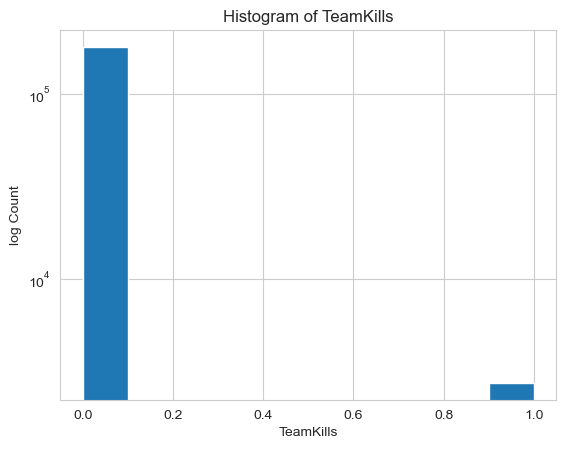

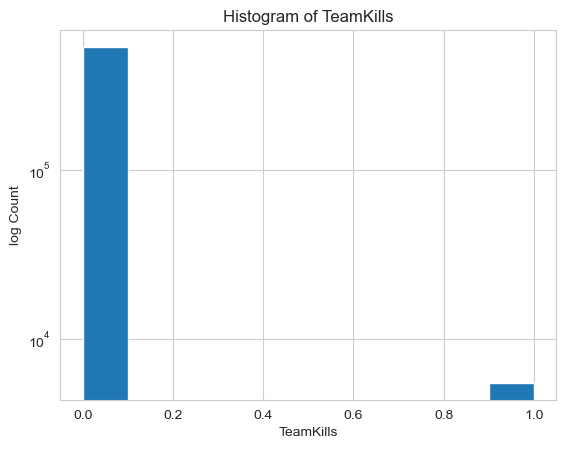

Min value of VehicleDestroys is:  0
Max value of VehicleDestroys is:  5
Min value of VehicleDestroys is:  0
Max value of VehicleDestroys is:  5


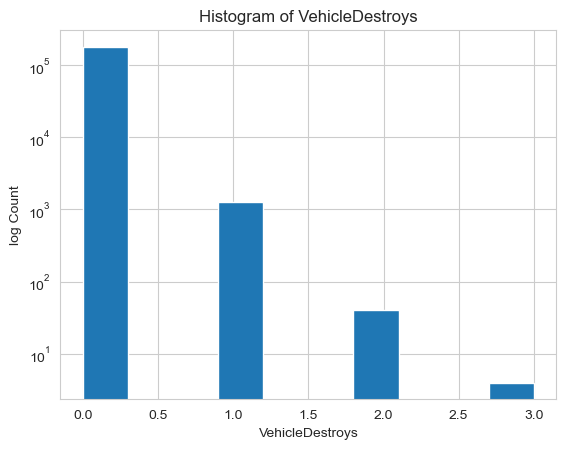

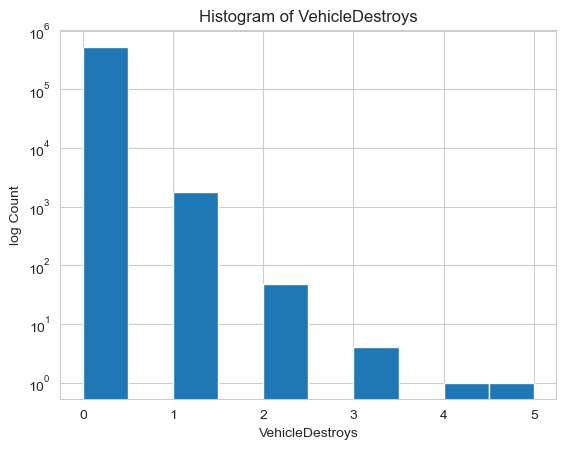

Min value of WalkDistance is:  0.0
Max value of WalkDistance is:  25780.0
Min value of WalkDistance is:  0.0
Max value of WalkDistance is:  25780.0


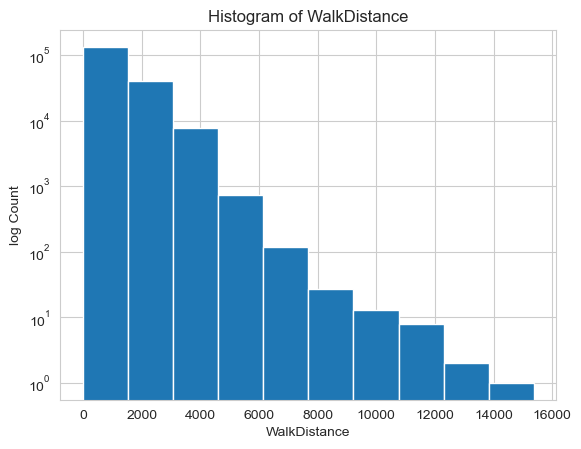

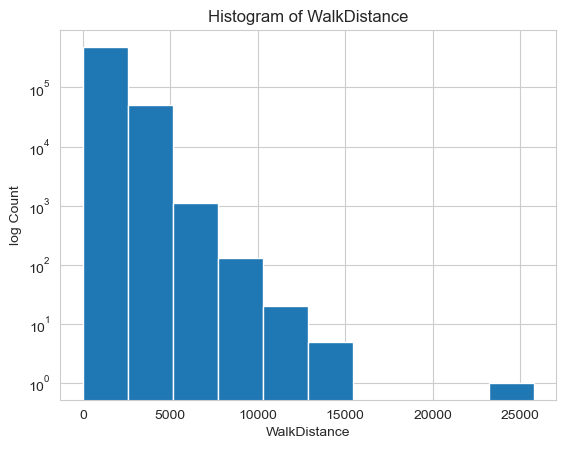

Min value of WeaponsAcquired is:  0
Max value of WeaponsAcquired is:  236
Min value of WeaponsAcquired is:  0
Max value of WeaponsAcquired is:  236


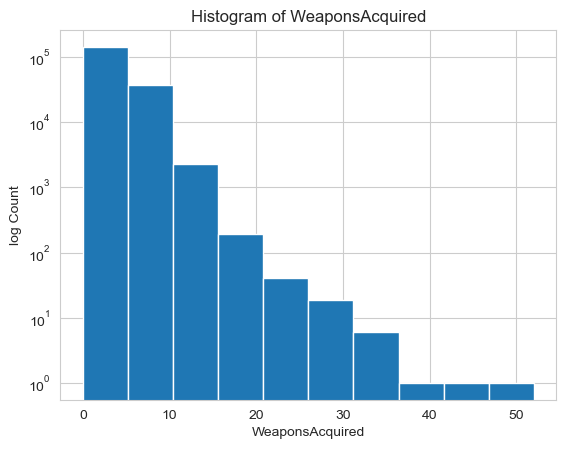

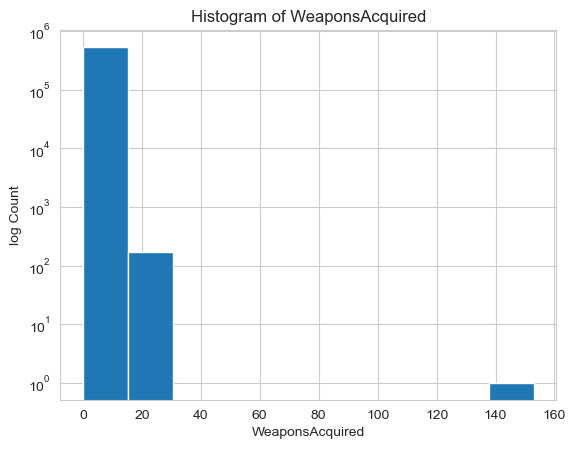

Min value of WinPoints is:  0
Max value of WinPoints is:  2013
Min value of WinPoints is:  0
Max value of WinPoints is:  2013


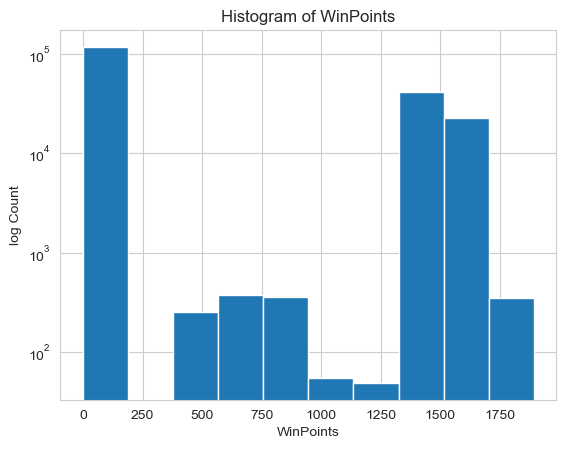

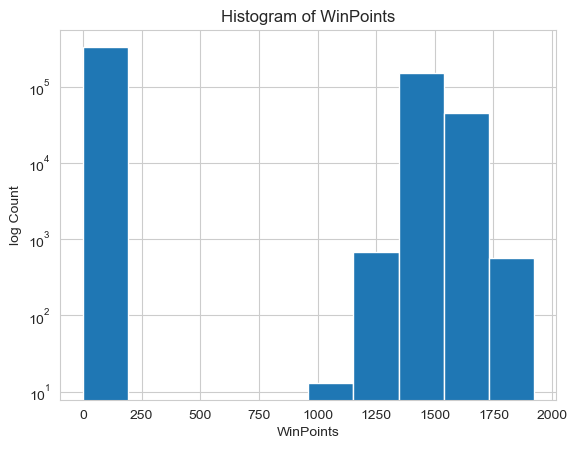

Min value of WinPlacePerc is:  0.0
Max value of WinPlacePerc is:  1.0
Min value of WinPlacePerc is:  0.0
Max value of WinPlacePerc is:  1.0


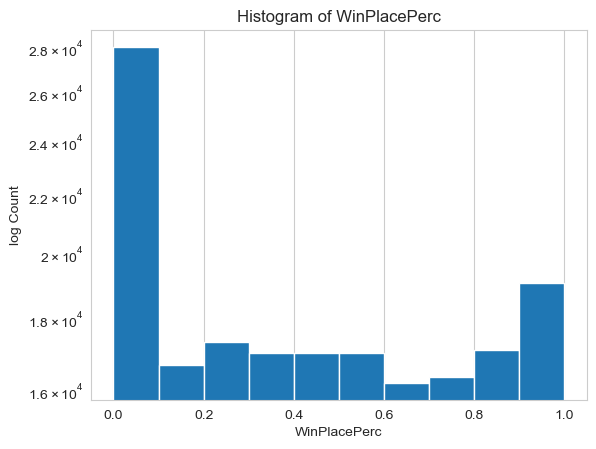

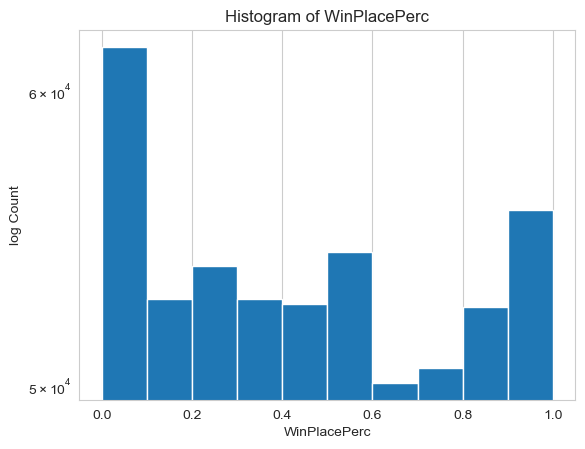

In [102]:
for i in trainDF_numeric.columns:
    visualize(i, soloDF, 10)
    visualize(i, solofppDF, 10)
    plt.show()

In [104]:
soloDF.corr()

ValueError: could not convert string to float: '269c3fc4a26935'

In [ ]:
soloDF_numeric = soloDF.loc[:, soloDF.dtypes != 'object']
soloDF_numeric


In [ ]:
soloDF_numeric.describe()

In [ ]:
soloDF_numeric_NoDBOsRevives = soloDF_numeric.drop(['DBNOs', 'revives'], axis=1)

soloDF_numeric_NoDBOsRevives.describe()

In [ ]:
solofppDF_numeric = solofppDF.loc[:, solofppDF.dtypes != 'object']
solofppDF_numeric_NoDBOsRevives = solofppDF_numeric.drop(['DBNOs', 'revives'], axis=1)

solofppDF_numeric_NoDBOsRevives.describe()

In [105]:
drop_features_replace = ["rankPoints", "winPoints"]
winRankPoints = soloDF_numeric.describe()
["rankPoints"].replace(-1, 0) + soloDF_numeric.describe()
["winPoints"]

soloDF_final= pd.concat(
    [
        soloDF_numeric.describe()
.drop(drop_features_replace + ["winPlacePerc"], axis=1),
        winRankPoints.rename("winRankPoints"),
        soloDF_numeric.describe()
["winPlacePerc"],
    ],
    axis=1,
)
soloDF_final.info()

NameError: name 'soloDF_numeric' is not defined